In [1]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import final_forward_attenuation
importlib.reload(final_forward_attenuation)
from final_forward_attenuation import run_simulation, default_species, convert_atm, txt_to_npy, convert_vmr, plot_npy, plot_histogram, downsample, count_lines_by_index

c:\Users\PC\Documents\GitHub\Stand-off
Using species: ['H2O']
DEBUG: H2O iso=1 qfile=TIPS/H2O/q1.txt exists=True
DEBUG: H2O iso=2 qfile=TIPS/H2O/q2.txt exists=True
DEBUG: H2O iso=3 qfile=TIPS/H2O/q3.txt exists=True
DEBUG: H2O iso=4 qfile=TIPS/H2O/q4.txt exists=True
DEBUG: H2O iso=5 qfile=TIPS/H2O/q5.txt exists=True
DEBUG: H2O iso=6 qfile=TIPS/H2O/q6.txt exists=True
DEBUG: H2O iso=7 qfile=TIPS/H2O/q129.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

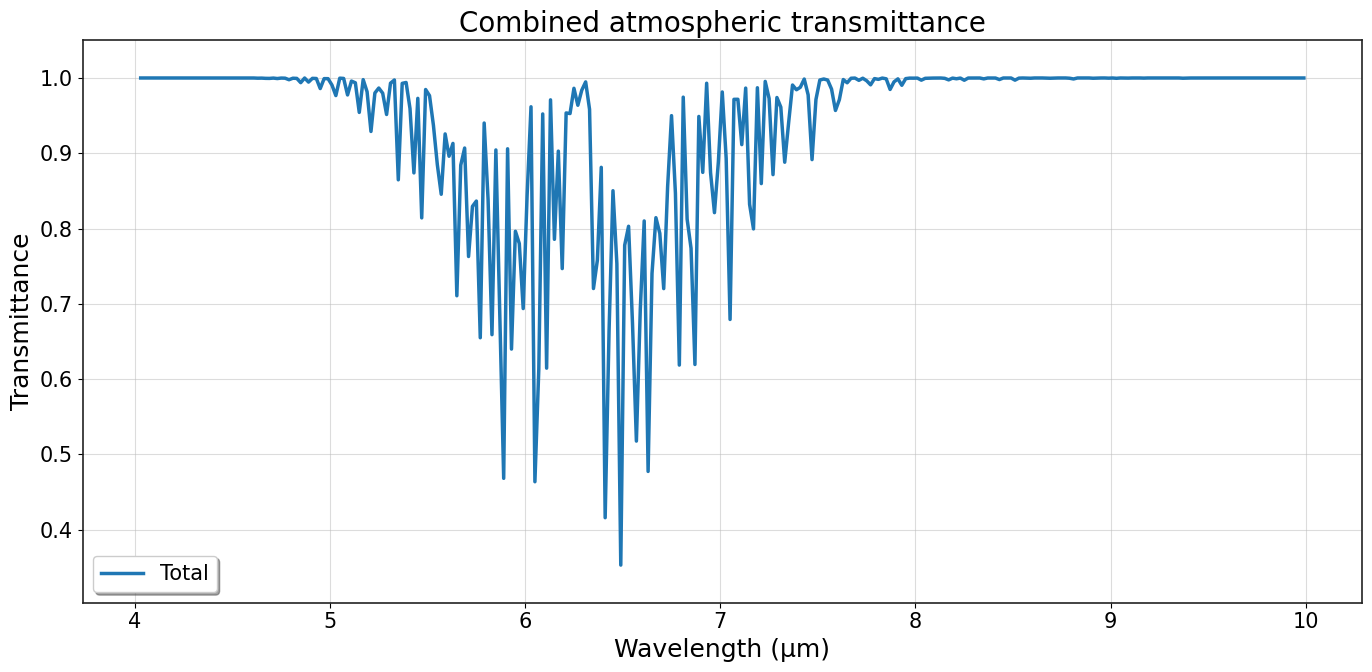

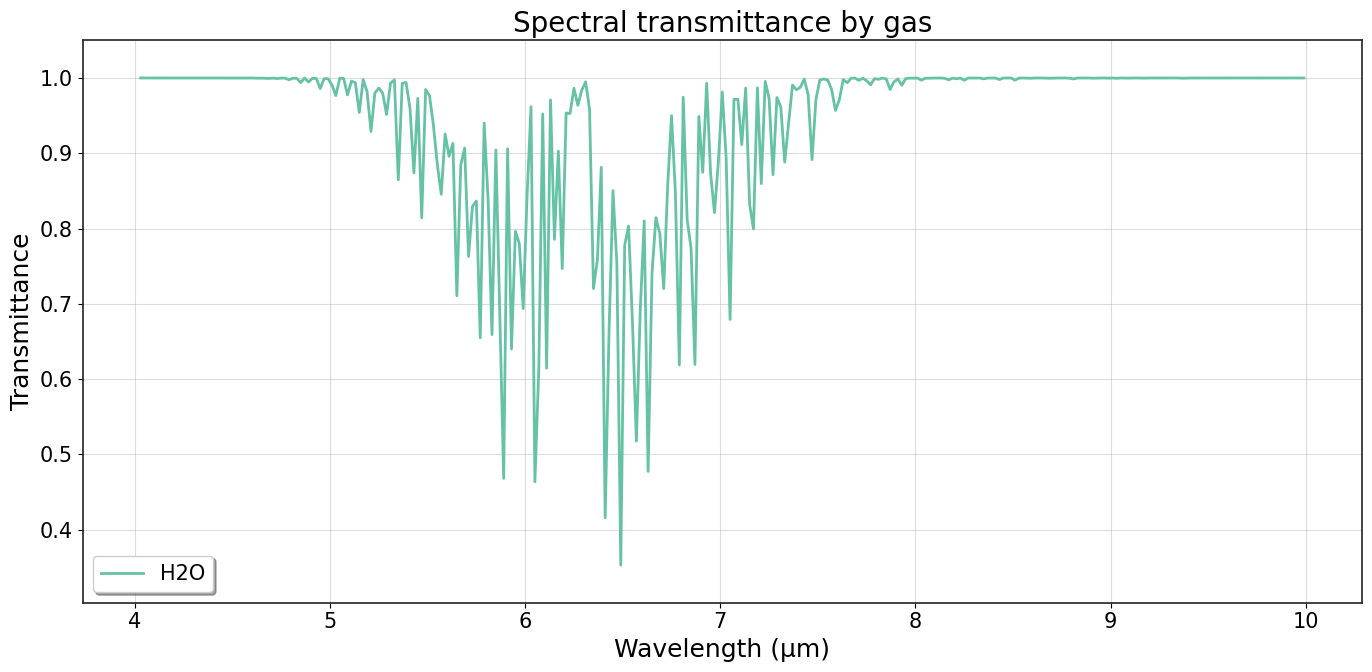

In [2]:
Ptotal = convert_atm(1013, "mbar")
T = 288.2

sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0.0077480878361707375 
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='PARS/ALL.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=True, 
    att=False, transmission_npy_name='Simulated_Standard_H2O_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['H2O']

)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]

In [3]:


prueba = np.load("SIMULATED/Simulated_Standard_H2O_4-10_1m.npy")                       # (3, 299)
trans  = np.load("GT_PROFE/Transmittance_Standard_H2O_4-10_1m.npy")        # (2, 644299)

lam_tgt = prueba[0]   # centros objetivo (misma resolución que "Prueba_Isotopologos")
lam_src = trans[0]
tau_src = trans[1]


edges = np.empty(lam_tgt.size + 1)
edges[1:-1] = 0.5 * (lam_tgt[:-1] + lam_tgt[1:])
edges[0]    = lam_tgt[0]  - 0.5 * (lam_tgt[1] - lam_tgt[0])
edges[-1]   = lam_tgt[-1] + 0.5 * (lam_tgt[-1] - lam_tgt[-2])


cum = np.concatenate([[0.0], np.cumsum(0.5 * (tau_src[:-1] + tau_src[1:]) * (lam_src[1:] - lam_src[:-1]))])

def cum_at(x):
    return np.interp(x, lam_src, cum)


area = cum_at(edges[1:]) - cum_at(edges[:-1])
tau_ds = area / (edges[1:] - edges[:-1])

valid = (edges[:-1] >= lam_src[0]) & (edges[1:] <= lam_src[-1])
tau_ds[~valid] = np.nan

out = np.vstack([lam_tgt, tau_ds])
np.save("SIMULATED/Transmittance_Standard_H2O_4-10_1m__downsampled_to_Prueba_Isotopologos.npy", out)


In [8]:
# sim = np.load("SIMULATED/Simulated_Standard_H2O_4-10_1m.npy")  
# sim = sim[:, :-1]
# sim.shape
# np.save("SIMULATED/Simulated_Standard_H2O_4-10_1m.npy", sim)

In [9]:
# gt = np.load("SIMULATED/Transmittance_Standard_H2O_4-10_1m__downsampled_to_Prueba_Isotopologos.npy") 
# gt = gt[:, :-1]
# gt.shape
# np.save("SIMULATED/Transmittance_Standard_H2O_4-10_1m__downsampled_to_Prueba_Isotopologos.npy", gt)

In [4]:
gt = np.load("SIMULATED/Transmittance_Standard_H2O_4-10_1m__downsampled_to_Prueba_Isotopologos.npy")
sim = np.load("SIMULATED/Simulated_Standard_H2O_4-10_1m.npy")  
print(gt.shape)
print(sim.shape)

(2, 299)
(2, 299)


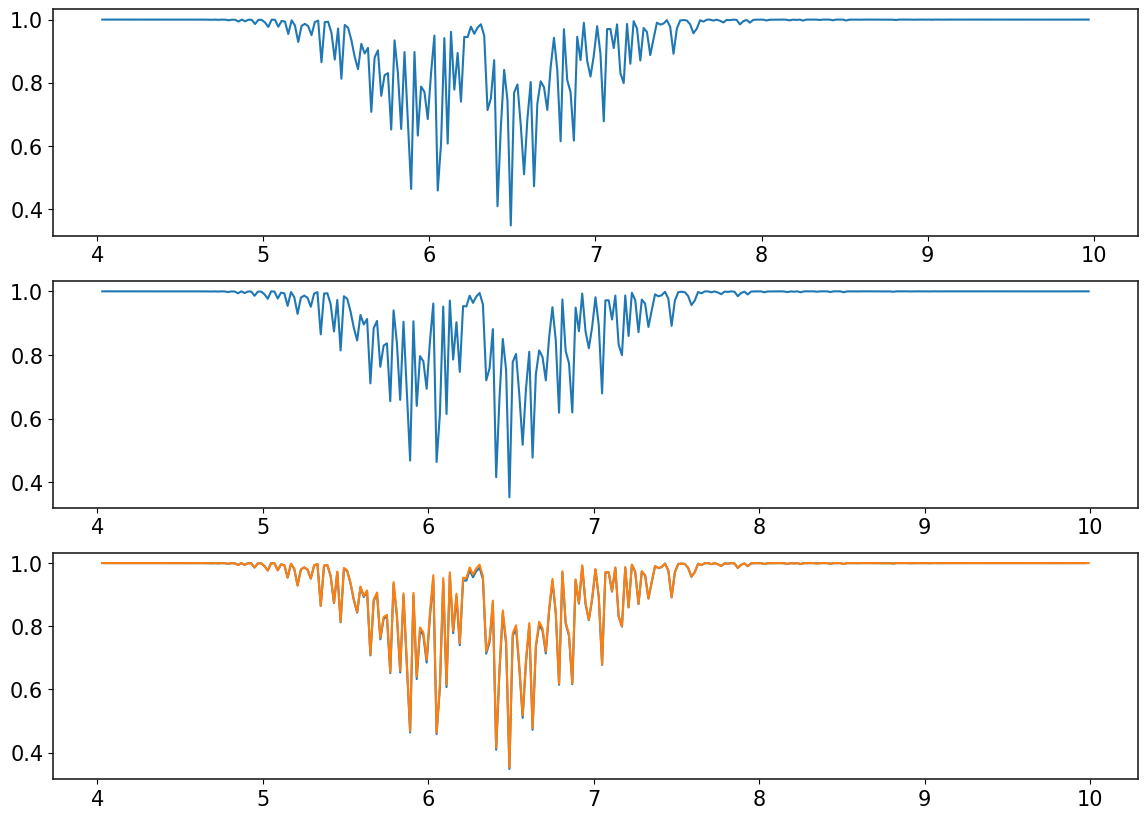

In [5]:
gt = np.load("SIMULATED/Transmittance_Standard_H2O_4-10_1m__downsampled_to_Prueba_Isotopologos.npy")
sim = np.load("SIMULATED/Simulated_Standard_H2O_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [6]:
gt[0]-sim[0] #misma resolucion y muestreo

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

MAE: nan


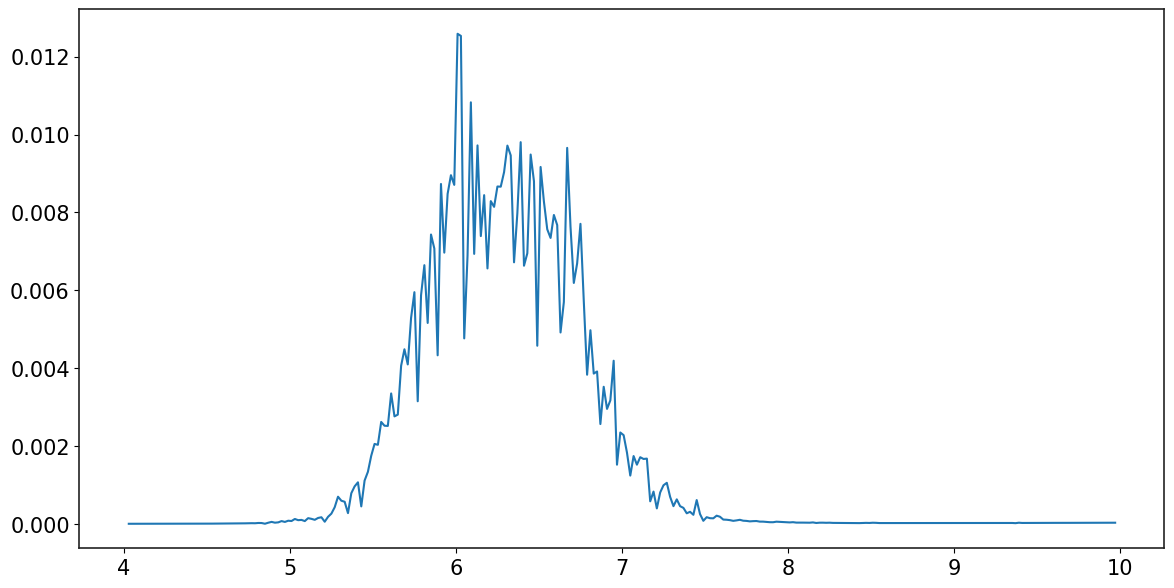

In [7]:
residual = np.abs((gt[1]-sim[1]))
mae = np.mean(np.abs(gt[1]-sim[1]))
plt.figure(figsize=(14,7))
plt.plot(gt[0], residual)
print("MAE:", mae)

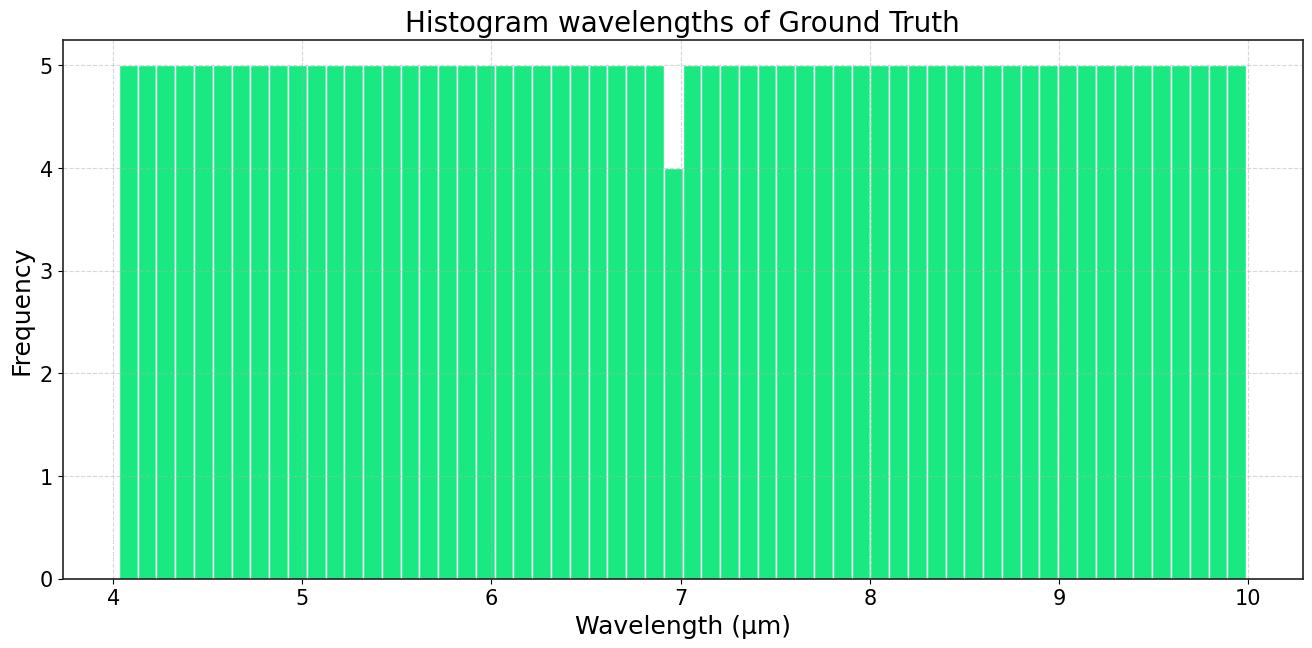

In [8]:
plot_histogram(gt[0],name='Ground Truth')

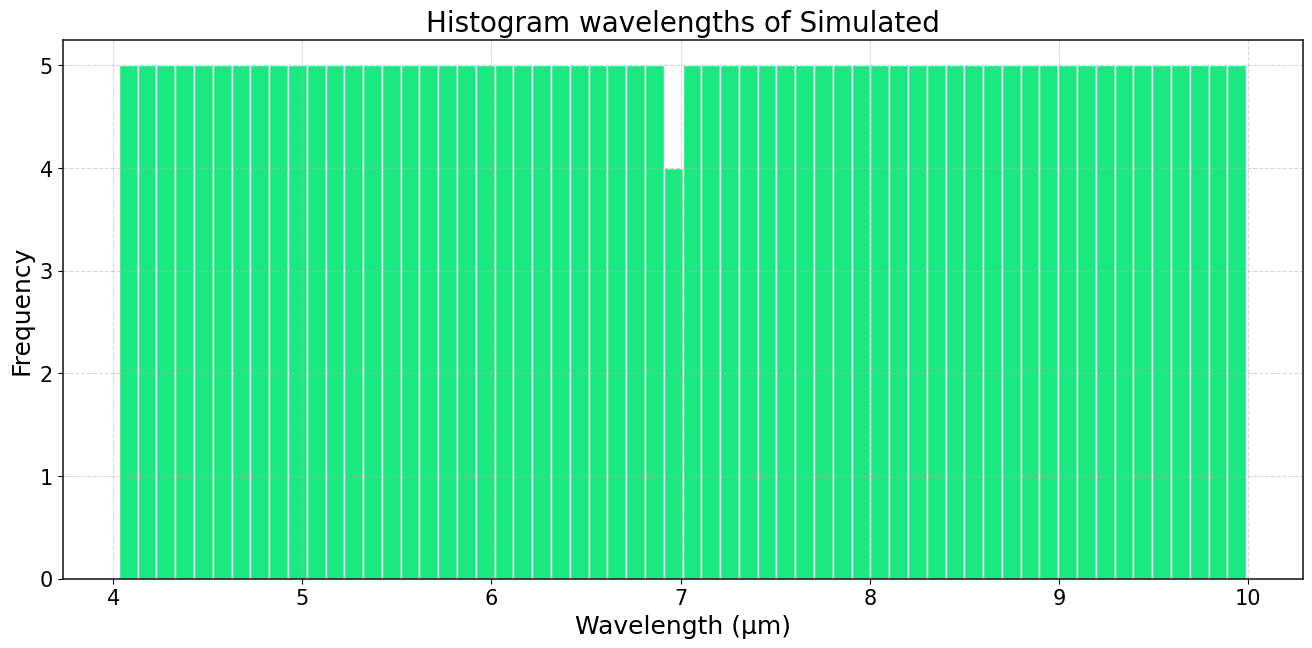

In [9]:
plot_histogram(sim[0],name='Simulated')

CO2

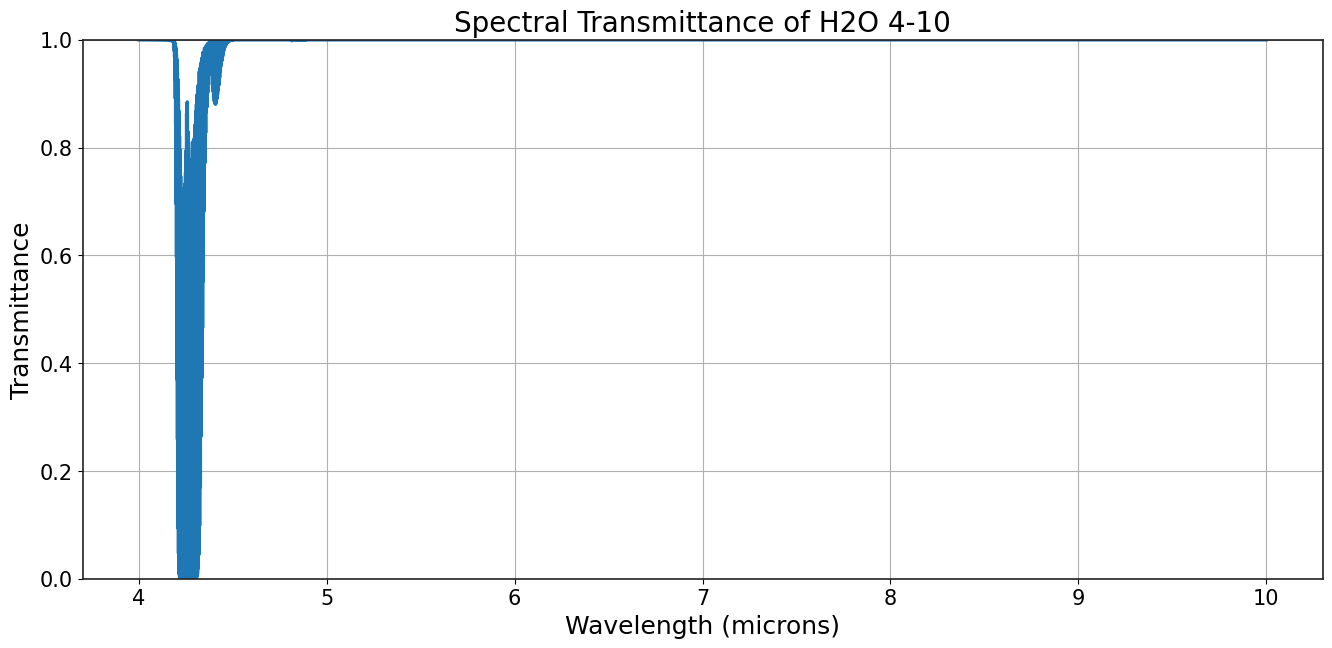

In [10]:
'''ground truth'''
sign = np.load("GT_PROFE/Transmittance_Standard_CO2_4-10_1m.npy")
plot_npy(sign[0], sign[1], name='H2O 4-10')

In [11]:
'''simulated'''
Ptotal = convert_atm(1013, "mbar")
T = 288.2

sp = default_species()
for s in sp:
     if s.name == 'CO2': s.Pmol = 0.0003299185788304959
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='PARS/ALL.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_Standard_CO2_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['CO2']

)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]

c:\Users\PC\Documents\GitHub\Stand-off
Using species: ['CO2']
DEBUG: CO2 iso=1 qfile=TIPS/CO2/q7.txt exists=True
DEBUG: CO2 iso=2 qfile=TIPS/CO2/q8.txt exists=True
DEBUG: CO2 iso=3 qfile=TIPS/CO2/q9.txt exists=True
DEBUG: CO2 iso=4 qfile=TIPS/CO2/q10.txt exists=True
DEBUG: CO2 iso=5 qfile=TIPS/CO2/q11.txt exists=True
DEBUG: CO2 iso=6 qfile=TIPS/CO2/q12.txt exists=True
DEBUG: CO2 iso=7 qfile=TIPS/CO2/q13.txt exists=True
DEBUG: CO2 iso=8 qfile=TIPS/CO2/q14.txt exists=True
DEBUG: CO2 iso=9 qfile=TIPS/CO2/q15.txt exists=True
DEBUG: CO2 iso=10 qfile=TIPS/CO2/q120.txt exists=True
DEBUG: CO2 iso=A qfile=TIPS/CO2/q121.txt exists=True
DEBUG: CO2 iso=B qfile=TIPS/CO2/q122.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

In [12]:
simulated = np.load("SIMULATED/Simulated_Standard_CO2_4-10_1m.npy")
gt = np.load("GT_PROFE/Transmittance_Standard_CO2_4-10_1m.npy")
output = "SIMULATED/Transmittance_Standard_CO2_4-10_1m__downsampled_to_Simulated_Standard_CO2_4-10_1m.npy"
downsample(simulated, gt, output)

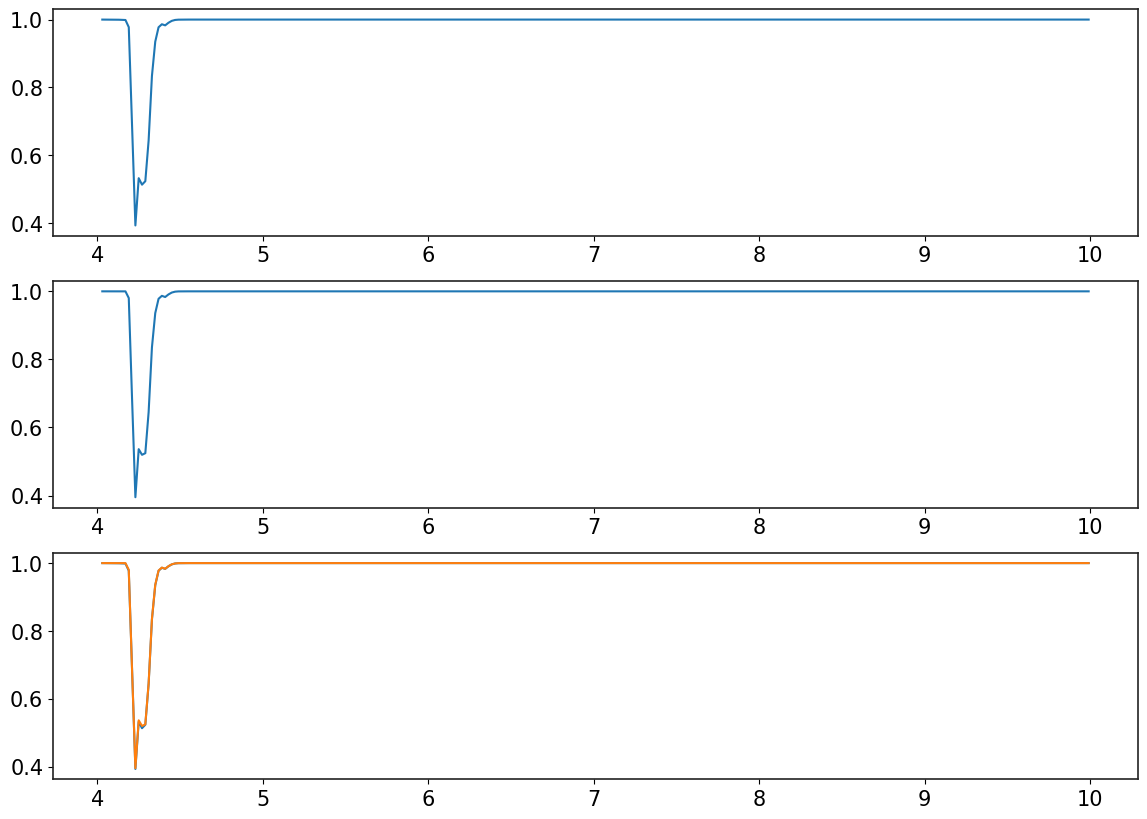

In [13]:
gt = np.load("SIMULATED/Transmittance_Standard_CO2_4-10_1m__downsampled_to_Simulated_Standard_CO2_4-10_1m.npy")
sim = np.load("SIMULATED/Simulated_Standard_CO2_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [14]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 9.697191273372523e-05


N2O

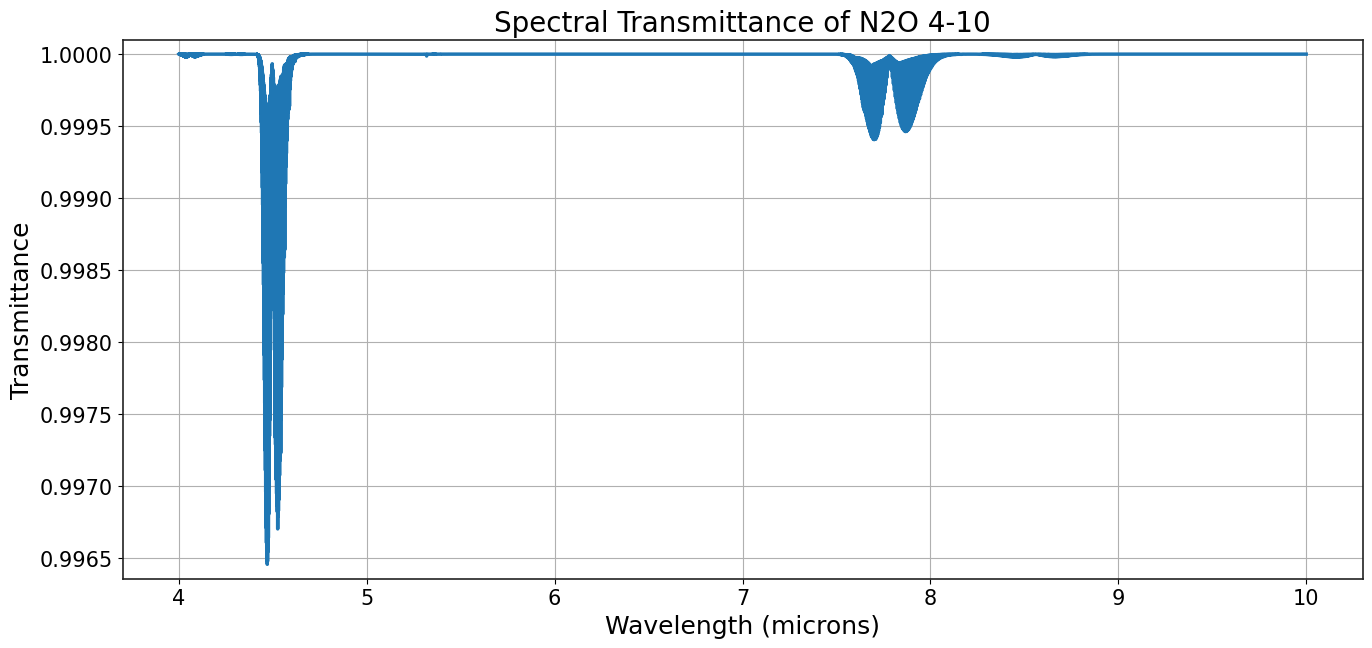

In [15]:
'''N2O 4-10'''
wave, tr = np.load('GT_PROFE/N2O_4-10.npy')
name = 'N2O 4-10'
plot_npy(wave, tr, name=name)

In [23]:
Ptotal = convert_atm(1013, "mbar")
3.2e-07 * Ptotal

3.1992104613866274e-07

## ***Prooving with N2O***

In [16]:
'''simulated'''
Ptotal = convert_atm(1013, "mbar")
T = 288.2

sp = default_species()
for s in sp:
     if s.name == 'N2O': s.Pmol = 3.1992104613866274e-07
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='PARS/ALL.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_N2O_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['N2O']

)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]

c:\Users\PC\Documents\GitHub\Stand-off
Using species: ['N2O']
DEBUG: N2O iso=1 qfile=TIPS/N2O/q21.txt exists=True
DEBUG: N2O iso=2 qfile=TIPS/N2O/q22.txt exists=True
DEBUG: N2O iso=3 qfile=TIPS/N2O/q23.txt exists=True
DEBUG: N2O iso=4 qfile=TIPS/N2O/q24.txt exists=True
DEBUG: N2O iso=5 qfile=TIPS/N2O/q25.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

In [17]:
gt = np.load("GT_PROFE/N2O_4-10.npy")
sim = np.load("SIMULATED/Simulated_N2O_4-10_1m.npy")  
output = "SIMULATED/Transmittance_N2O_4-10_1m__downsampled_to_Simulated_N2O_4-10_1m.npy"
downsample(sim, gt, output)

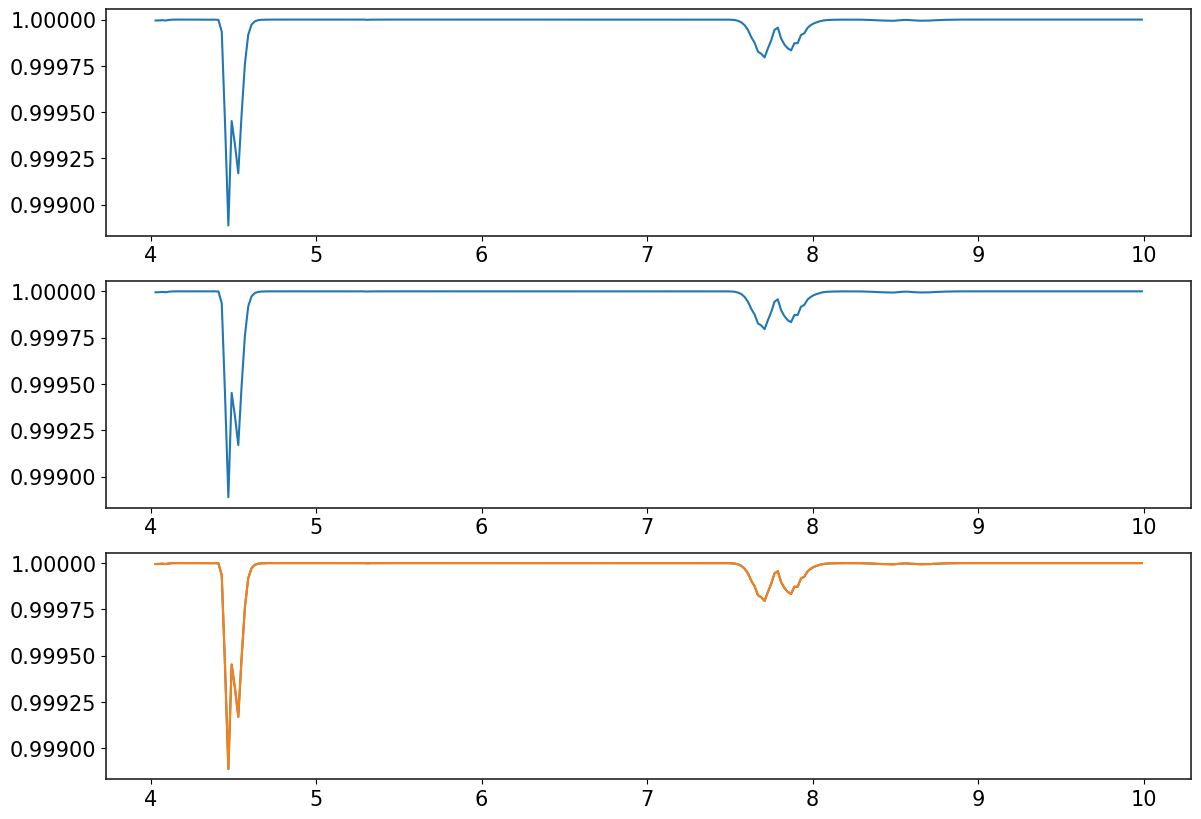

In [18]:
gt = np.load("SIMULATED/Transmittance_N2O_4-10_1m__downsampled_to_Simulated_N2O_4-10_1m.npy")
sim = np.load("SIMULATED/Simulated_N2O_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [19]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 9.153805797155256e-08


## ***Prooving with H2O***

In [20]:
'''simulated'''
Ptotal = convert_atm(1013, "mbar")
T = 288.2

sp = default_species()
for s in sp:
     if s.name == 'H2O': s.Pmol = 0.0077480878361707375
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='PARS/ALL.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_H2O_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['H2O']
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]


 

c:\Users\PC\Documents\GitHub\Stand-off
Using species: ['H2O']
DEBUG: H2O iso=1 qfile=TIPS/H2O/q1.txt exists=True
DEBUG: H2O iso=2 qfile=TIPS/H2O/q2.txt exists=True
DEBUG: H2O iso=3 qfile=TIPS/H2O/q3.txt exists=True
DEBUG: H2O iso=4 qfile=TIPS/H2O/q4.txt exists=True
DEBUG: H2O iso=5 qfile=TIPS/H2O/q5.txt exists=True
DEBUG: H2O iso=6 qfile=TIPS/H2O/q6.txt exists=True
DEBUG: H2O iso=7 qfile=TIPS/H2O/q129.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

In [22]:
gt = np.load("GT_PROFE/Transmittance_Standard_H2O_4-10_1m.npy")
sim = np.load("SIMULATED/Simulated_H2O_4-10_1m.npy")  
output = "SIMULATED/Transmittance_H2O_4-10_1m__downsampled_to_Simulated_H2O_4-10_1m.npy"
downsample(sim, gt, output)

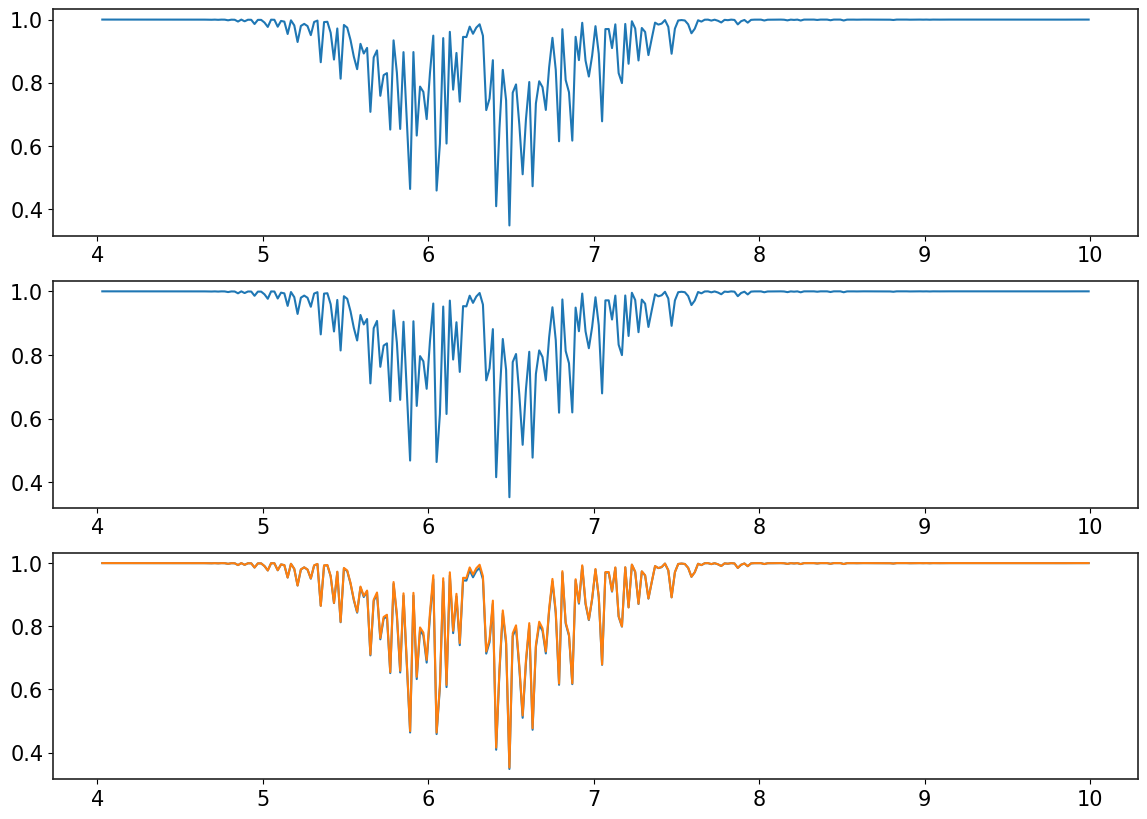

In [24]:
gt = np.load("SIMULATED/Transmittance_H2O_4-10_1m__downsampled_to_Simulated_H2O_4-10_1m.npy")
sim = np.load("SIMULATED/Simulated_H2O_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [25]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.0017216604449234094


## ***Prooving with CO***

In [33]:
'''simulated'''

vmr = 1.5e-07
Ptotal = convert_atm(1013, "mbar")
T = 288.2
Pmol = vmr * Ptotal
print(Pmol)

sp = default_species()
for s in sp:
     if s.name == 'CO': s.Pmol = Pmol
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='/home/jleon13/Documents/AFOSR project/Py4catsForward/Py4cats_Tinkering/680HIT87b.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_CO_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['CO']
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]


 

1.4996299037749815e-07
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off
Using species: ['CO']
DEBUG: CO iso=1 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO/q26.txt exists=True
DEBUG: CO iso=2 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO/q27.txt exists=True
DEBUG: CO iso=3 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO/q28.txt exists=True
DEBUG: CO iso=4 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO/q29.txt exists=True
DEBUG: CO iso=5 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO/q30.txt exists=True
DEBUG: CO iso=6 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO/q31.txt exists=True


/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Docum

In [10]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/GT_PROFE/CO_4-10.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_CO_4-10_1m.npy")  
output = "SIMULATED/Transmittance_CO_4-10_1m__downsampled_to_Simulated_CO_4-10_1m.npy"
downsample(sim, gt, output)

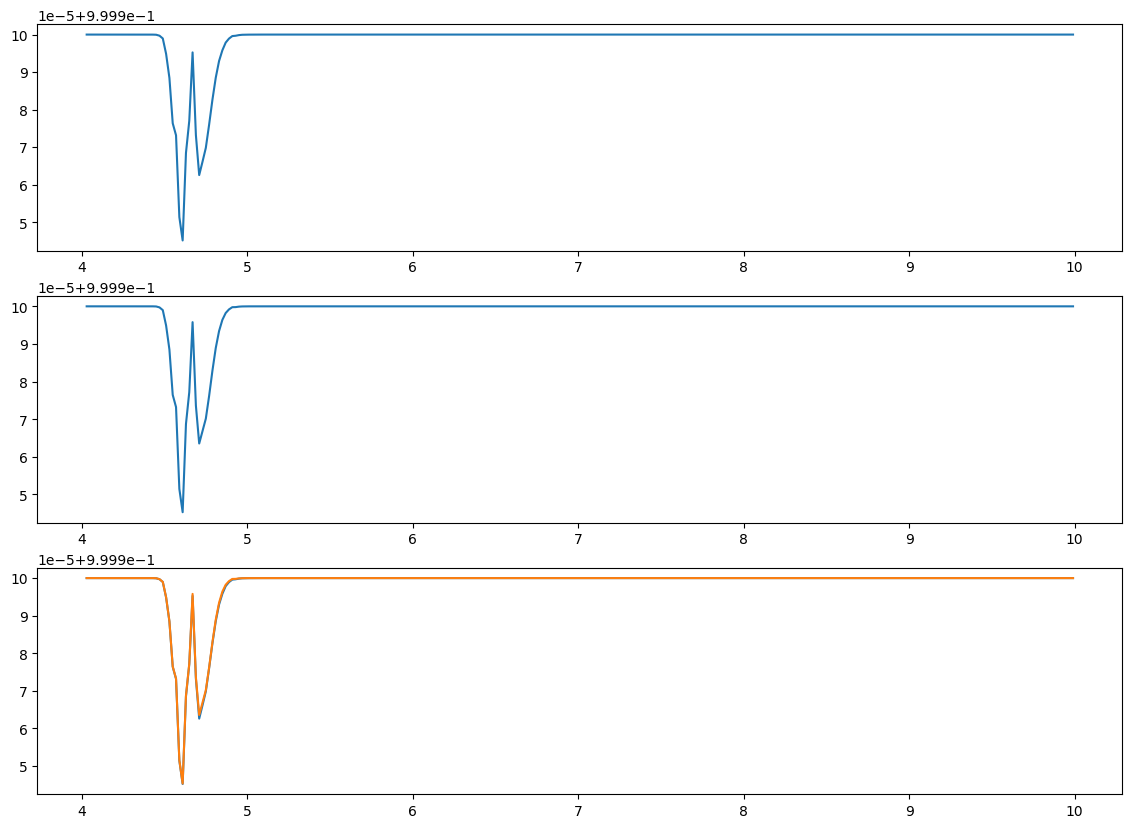

In [11]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_CO_4-10_1m__downsampled_to_Simulated_CO_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_CO_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [12]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 2.273570789791554e-08


## ***Prooving CH4***

In [34]:
'''simulated'''

vmr = 1.7e-06
Ptotal = convert_atm(1013, "mbar")
T = 288.2
Pmol = vmr * Ptotal
print(Pmol)
sp = default_species()
for s in sp:
     if s.name == 'CH4': s.Pmol = Pmol
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='/home/jleon13/Documents/AFOSR project/Py4catsForward/Py4cats_Tinkering/680HIT87b.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_CH4_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['CH4']
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]


 

1.6995805576116458e-06
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off
Using species: ['CH4']
DEBUG: CH4 iso=1 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CH4/q32.txt exists=True
DEBUG: CH4 iso=2 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CH4/q33.txt exists=True
DEBUG: CH4 iso=3 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CH4/q34.txt exists=True
DEBUG: CH4 iso=4 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CH4/q35.txt exists=True


/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Docum

In [14]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/GT_PROFE/CH4_4-10.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_CH4_4-10_1m.npy")  
output = "SIMULATED/Transmittance_CH4_4-10_1m__downsampled_to_Simulated_CH4_4-10_1m.npy"
downsample(sim, gt, output)

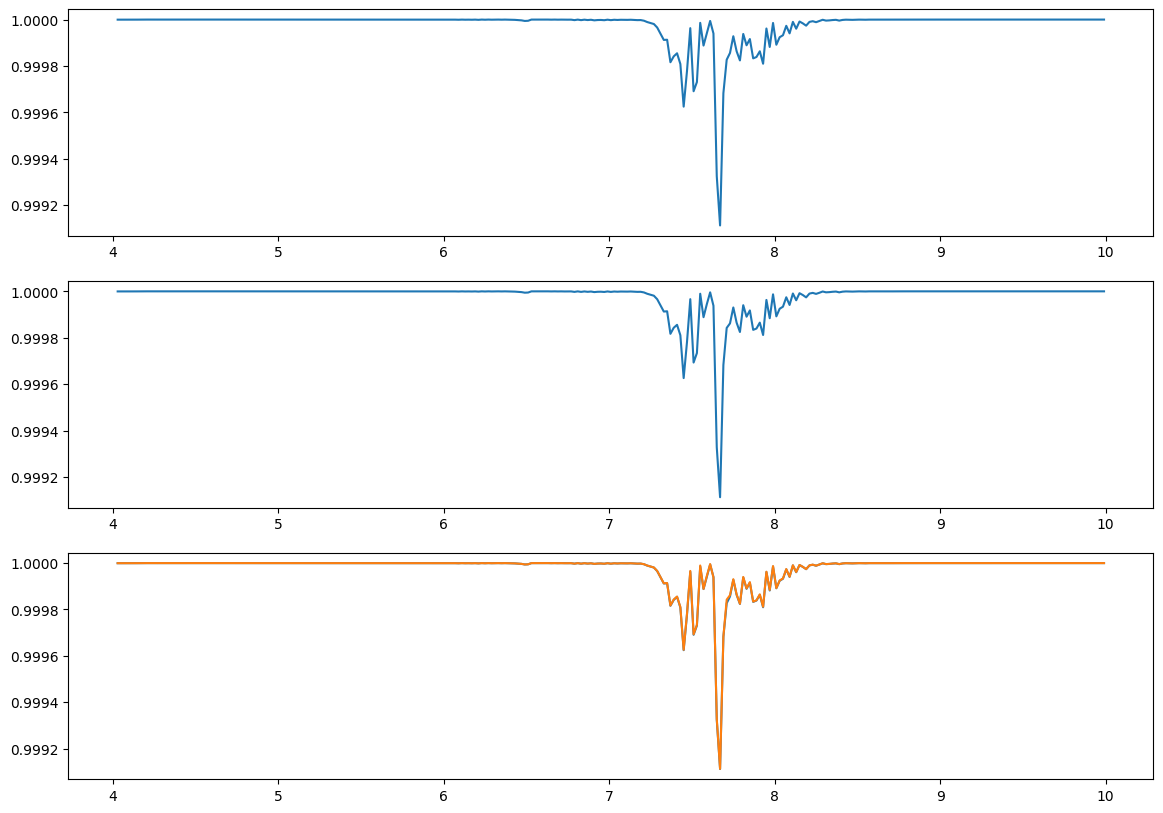

In [15]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_CH4_4-10_1m__downsampled_to_Simulated_CH4_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_CH4_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [16]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 3.2506988939547646e-07


## ***Prooving O3***

In [26]:
'''simulated'''

vmr = 2.66e-08
Ptotal = convert_atm(1013, "mbar")
T = 288.2
Pmol = vmr * Ptotal
print(Pmol)
sp = default_species()
for s in sp:
     if s.name == 'O3': s.Pmol = Pmol
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='PARS/ALL.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_O3_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['O3']
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]


 

2.6593436960276338e-08
c:\Users\PC\Documents\GitHub\Stand-off
Using species: ['O3']
DEBUG: O3 iso=1 qfile=TIPS/O3/q16.txt exists=True
DEBUG: O3 iso=2 qfile=TIPS/O3/q17.txt exists=True
DEBUG: O3 iso=3 qfile=TIPS/O3/q18.txt exists=True
DEBUG: O3 iso=4 qfile=TIPS/O3/q19.txt exists=True
DEBUG: O3 iso=5 qfile=TIPS/O3/q20.txt exists=True


c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

In [27]:
gt = np.load("GT_PROFE/O3_4-10um_1m.npy")
sim = np.load("SIMULATED/Simulated_O3_4-10_1m.npy")  
output = "SIMULATED/Transmittance_O3_4-10_1m__downsampled_to_Simulated_O3_4-10_1m.npy"
downsample(sim, gt, output)

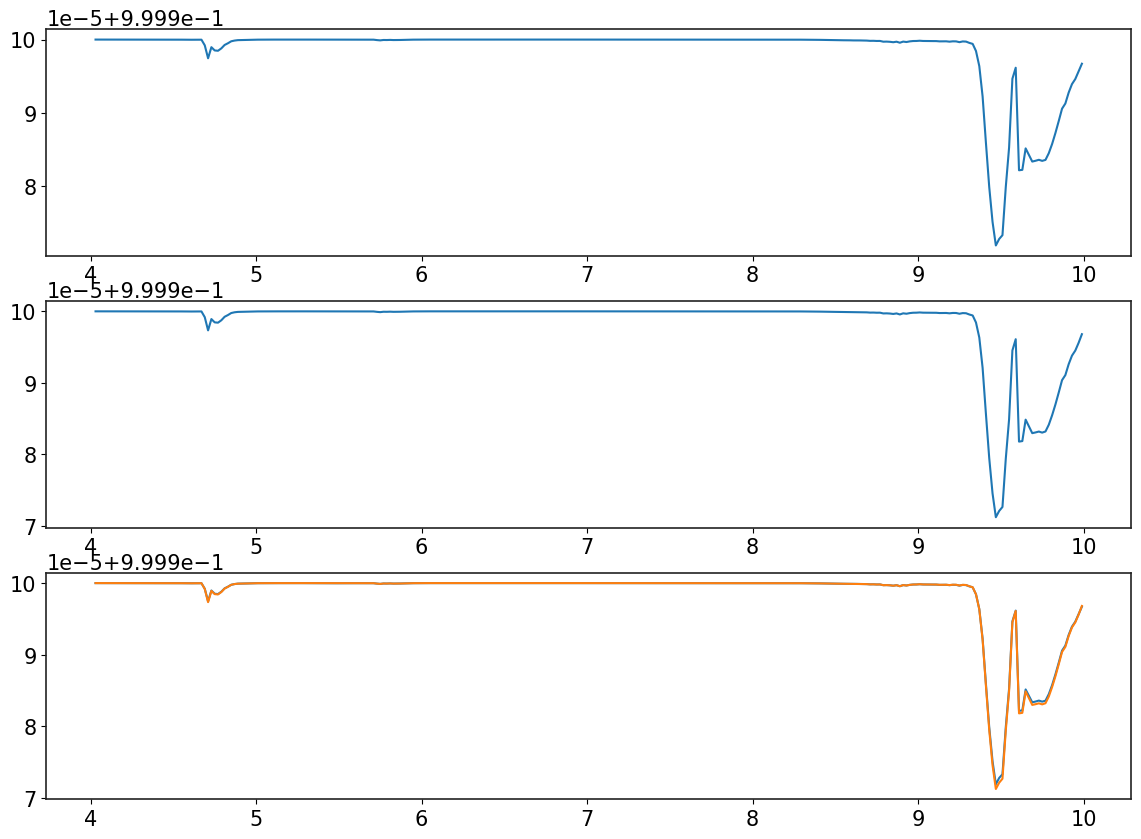

In [28]:
gt = np.load("SIMULATED/Transmittance_O3_4-10_1m__downsampled_to_Simulated_O3_4-10_1m.npy")
sim = np.load("SIMULATED/Simulated_O3_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [29]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 3.3365566730165015e-08


## ***Prooving CO2***

In [36]:
'''simulated'''

vmr = 0.00033
Ptotal = convert_atm(1013, "mbar")
T = 288.2
Pmol = vmr * Ptotal
print(Pmol) 
sp = default_species()
for s in sp:
     if s.name == 'CO2': s.Pmol = Pmol
     else: s.Pmol = 0.0
    

import os
print(os.getcwd())

res = run_simulation(
    species=sp,
    parfile='/home/jleon13/Documents/AFOSR project/Py4catsForward/Py4cats_Tinkering/680HIT87b.par',
    nu_min=1000, nu_max=2500, dnu=0.01,
    tileW=20.0, guard=5.0,
    temp_K=T, L_m=1.0, pres=Ptotal,
    delta_um=0.020,
    save_csv=True, outdir='OUT', make_plots=False, 
    att=False, transmission_npy_name='Simulated_CO2_4-10_1m.npy',
    use_all_isotopologues=True, species_to_use=['CO2']
)

lambda_um = res['lambda_centers']
Tprod = res['T_prod_samp']
Tco2  = res['T_each_samp'][0]

0.0003299185788304959
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off
Using species: ['CO2']
DEBUG: CO2 iso=1 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q7.txt exists=True
DEBUG: CO2 iso=2 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q8.txt exists=True
DEBUG: CO2 iso=3 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q9.txt exists=True
DEBUG: CO2 iso=4 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q10.txt exists=True
DEBUG: CO2 iso=5 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q11.txt exists=True
DEBUG: CO2 iso=6 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q12.txt exists=True
DEBUG: CO2 iso=7 qfile=/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/TIPS/CO2/q13.tx

/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/final_forward_attenuation.py:265: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
/home/jleon13/Docum

In [30]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/GT_PROFE/Transmittance_Standard_CO2_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_CO2_4-10_1m.npy")  
output = "SIMULATED/Transmittance_CO2_4-10_1m__downsampled_to_Simulated_CO2_4-10_1m.npy"
downsample(sim, gt, output)

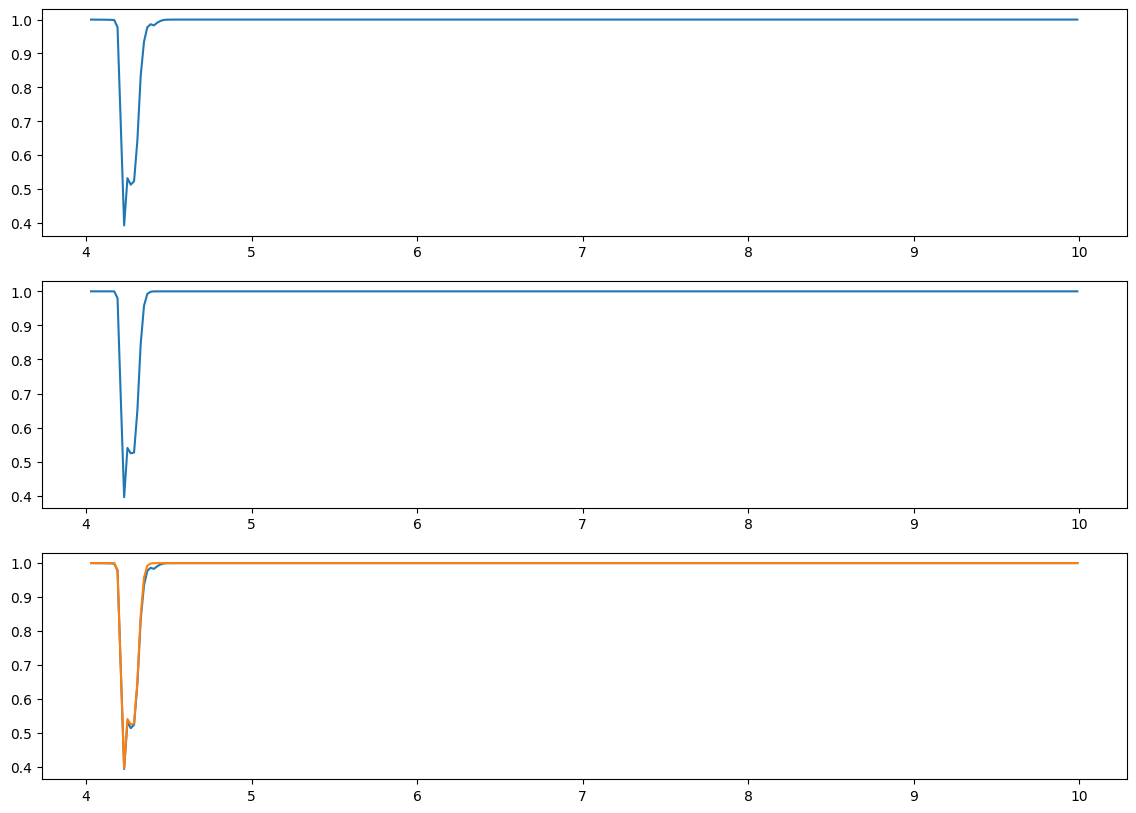

In [31]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_CO2_4-10_1m__downsampled_to_Simulated_CO2_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_CO2_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [32]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.00044533563743631894


### ***Change format of the all combined data***

In [30]:
import numpy as np


data = np.loadtxt('GT_PROFE_TXT/Standard_All_4-30um_1m.txt') 
np.save('GT_PROFE/Standard_All_4-30um_1m.npy', data)

print(f"Shape of data: {data.shape}")
print(f"Data saved to GT_PROFE/Standard_All_4-30um_1m.npy")

Shape of data: (1046074, 2)
Data saved to GT_PROFE/Standard_All_4-30um_1m.npy


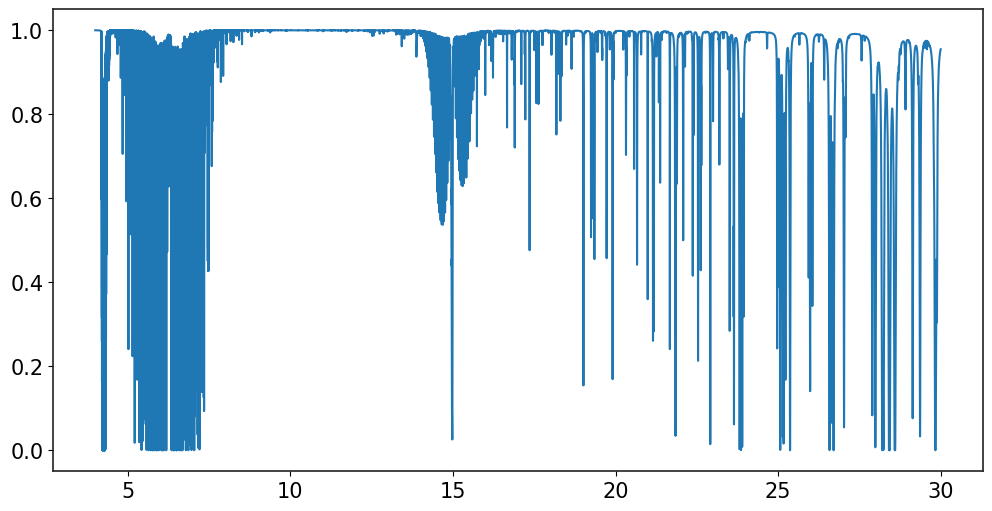

In [39]:
data = np.load('GT_PROFE/Standard_All_4-30um_1m.npy')
plt.figure(figsize=(12,6))
plt.plot(data[:,0], data[:,1])

## ***Prooving all gases***

In [74]:
# run_all_gases.py
from final_forward_attenuation import *

def main():
    Ptotal = convert_atm(1013, "mbar")  # total pressure [atm]
    T = 288.2                          # temperature [K]
    L_m = 1.0                           # path length [m]

    sp = default_species()              # already has partial pressures (atm) in s.Pmol
        
    res = run_simulation(
        species=sp,
        parfile="PARS/ALL.par",
        nu_min=1000, nu_max=2500, dnu=0.01,
        tileW=20.0, guard=5.0,
        temp_K=T, L_m=L_m, pres=Ptotal, #standard 1 atm
        delta_um=0.020,
        save_csv=True, outdir="OUT", make_plots=False,
        att=False,
        transmission_npy_name="Simulated_ALLGASES_4-10_1m.npy",
        use_all_isotopologues=True,
        species_to_use=None,  # IMPORTANT: None => run all gases
    )

    lambda_um = res["lambda_centers"]
    T_total   = res["T_prod_samp"]      # total transmittance (product of all gases)
    T_each    = res["T_each_samp"]      # per-gas transmittance
    names     = [s.name for s in res["species"]]

    print("Bands:", lambda_um.shape, "T_total range:", T_total.min(), T_total.max())
    print("Gases:", names)

if __name__ == "__main__":
    main()


DEBUG: H2O iso=1 qfile=TIPS/H2O/q1.txt exists=True
DEBUG: H2O iso=2 qfile=TIPS/H2O/q2.txt exists=True
DEBUG: H2O iso=3 qfile=TIPS/H2O/q3.txt exists=True
DEBUG: H2O iso=4 qfile=TIPS/H2O/q4.txt exists=True
DEBUG: H2O iso=5 qfile=TIPS/H2O/q5.txt exists=True
DEBUG: H2O iso=6 qfile=TIPS/H2O/q6.txt exists=True
DEBUG: H2O iso=7 qfile=TIPS/H2O/q129.txt exists=True
DEBUG: CO2 iso=1 qfile=TIPS/CO2/q7.txt exists=True
DEBUG: CO2 iso=2 qfile=TIPS/CO2/q8.txt exists=True
DEBUG: CO2 iso=3 qfile=TIPS/CO2/q9.txt exists=True
DEBUG: CO2 iso=4 qfile=TIPS/CO2/q10.txt exists=True
DEBUG: CO2 iso=5 qfile=TIPS/CO2/q11.txt exists=True
DEBUG: CO2 iso=6 qfile=TIPS/CO2/q12.txt exists=True
DEBUG: CO2 iso=7 qfile=TIPS/CO2/q13.txt exists=True
DEBUG: CO2 iso=8 qfile=TIPS/CO2/q14.txt exists=True
DEBUG: CO2 iso=9 qfile=TIPS/CO2/q15.txt exists=True
DEBUG: CO2 iso=10 qfile=TIPS/CO2/q120.txt exists=True
DEBUG: CO2 iso=A qfile=TIPS/CO2/q121.txt exists=True
DEBUG: CO2 iso=B qfile=TIPS/CO2/q122.txt exists=True
DEBUG: O3 iso=1 

c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

Bands: (299,) T_total range: 0.15831738333645046 0.9999977103494668
Gases: ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4', 'O2']


In [71]:
# run_all_gases.py
from final_forward_attenuation import *

def main():
    Ptotal = convert_atm(1013, "mbar")  # total pressure [atm]
    T = 288.2                          # temperature [K]
    L_m = 1.0                           # path length [m]

    sp = default_species()              # already has partial pressures (atm) in s.Pmol

    for s in sp:
        if s.name == 'H2O': s.Pmol = 0.00775 * Ptotal
        if s.name == 'CO2': s.Pmol = 0.00033 * Ptotal
        if s.name == 'O3': s.Pmol = 2.66e-08 * Ptotal
        if s.name == 'N2O': s.Pmol = 3.2e-07 * Ptotal
        if s.name == 'CO': s.Pmol = 1.5e-07 * Ptotal
        if s.name == 'CH4': s.Pmol = 1.7e-06 * Ptotal
        
    res = run_simulation(
        species=sp,
        parfile="PARS/ALL.par",
        nu_min=1000, nu_max=2500, dnu=0.01,
        tileW=20.0, guard=5.0,
        temp_K=T, L_m=L_m, pres=1, #standard 1 atm
        delta_um=0.020,
        save_csv=True, outdir="OUT", make_plots=False,
        att=False,
        transmission_npy_name="Simulated_ALLGASES_2_4-10_1m.npy",
        use_all_isotopologues=True,
        species_to_use=['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4'],  # IMPORTANT: None => run all gases
    )

    lambda_um = res["lambda_centers"]
    T_total   = res["T_prod_samp"]      # total transmittance (product of all gases)
    T_each    = res["T_each_samp"]      # per-gas transmittance
    names     = [s.name for s in res["species"]]

    print("Bands:", lambda_um.shape, "T_total range:", T_total.min(), T_total.max())
    print("Gases:", names)

if __name__ == "__main__":
    main()


Using species: ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4']
DEBUG: H2O iso=1 qfile=TIPS/H2O/q1.txt exists=True
DEBUG: H2O iso=2 qfile=TIPS/H2O/q2.txt exists=True
DEBUG: H2O iso=3 qfile=TIPS/H2O/q3.txt exists=True
DEBUG: H2O iso=4 qfile=TIPS/H2O/q4.txt exists=True
DEBUG: H2O iso=5 qfile=TIPS/H2O/q5.txt exists=True
DEBUG: H2O iso=6 qfile=TIPS/H2O/q6.txt exists=True
DEBUG: H2O iso=7 qfile=TIPS/H2O/q129.txt exists=True
DEBUG: CO2 iso=1 qfile=TIPS/CO2/q7.txt exists=True
DEBUG: CO2 iso=2 qfile=TIPS/CO2/q8.txt exists=True
DEBUG: CO2 iso=3 qfile=TIPS/CO2/q9.txt exists=True
DEBUG: CO2 iso=4 qfile=TIPS/CO2/q10.txt exists=True
DEBUG: CO2 iso=5 qfile=TIPS/CO2/q11.txt exists=True
DEBUG: CO2 iso=6 qfile=TIPS/CO2/q12.txt exists=True
DEBUG: CO2 iso=7 qfile=TIPS/CO2/q13.txt exists=True
DEBUG: CO2 iso=8 qfile=TIPS/CO2/q14.txt exists=True
DEBUG: CO2 iso=9 qfile=TIPS/CO2/q15.txt exists=True
DEBUG: CO2 iso=10 qfile=TIPS/CO2/q120.txt exists=True
DEBUG: CO2 iso=A qfile=TIPS/CO2/q121.txt exists=True
DEBUG: CO2 is

c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(qfile, header=None, delim_whitespace=True, comment='#')
c:\Users\PC\Documents\GitHub\Stand-off\final_forward_attenuation.py:252: FutureWarning: The 'delim_whitespace' keyword in pd.read_

Bands: (299,) T_total range: 0.3529903876756031 0.999998398262201
Gases: ['H2O', 'CO2', 'O3', 'N2O', 'CO', 'CH4']


In [75]:
gt = np.load("GT_PROFE/Standard_All_4-30um_1m.npy")
gt = np.transpose(gt)
sim = np.load("SIMULATED/Simulated_ALLGASES_4-10_1m.npy")  
output = "SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy"
downsample(sim, gt, output)

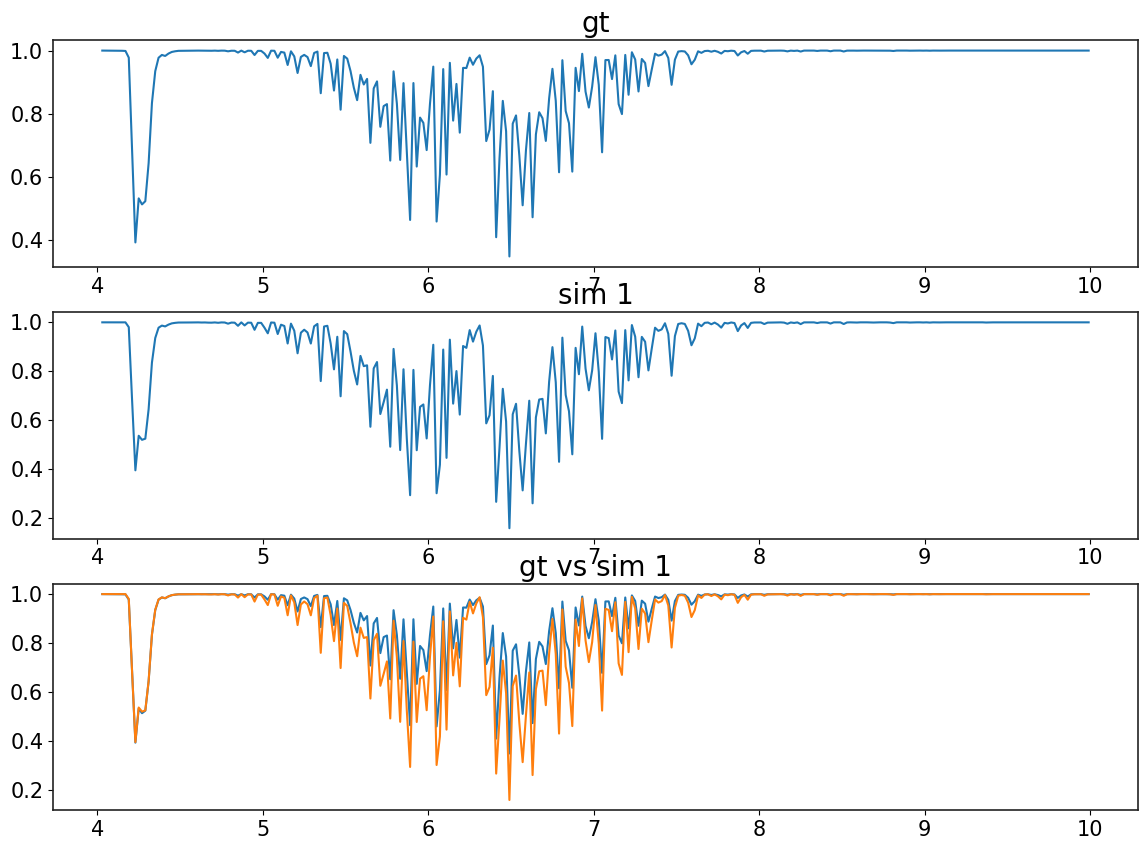

In [77]:
gt = np.load("SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("SIMULATED/Simulated_ALLGASES_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.title('gt')
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.title('sim 1')
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.title('gt vs sim 1')
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [78]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.034240792826518776


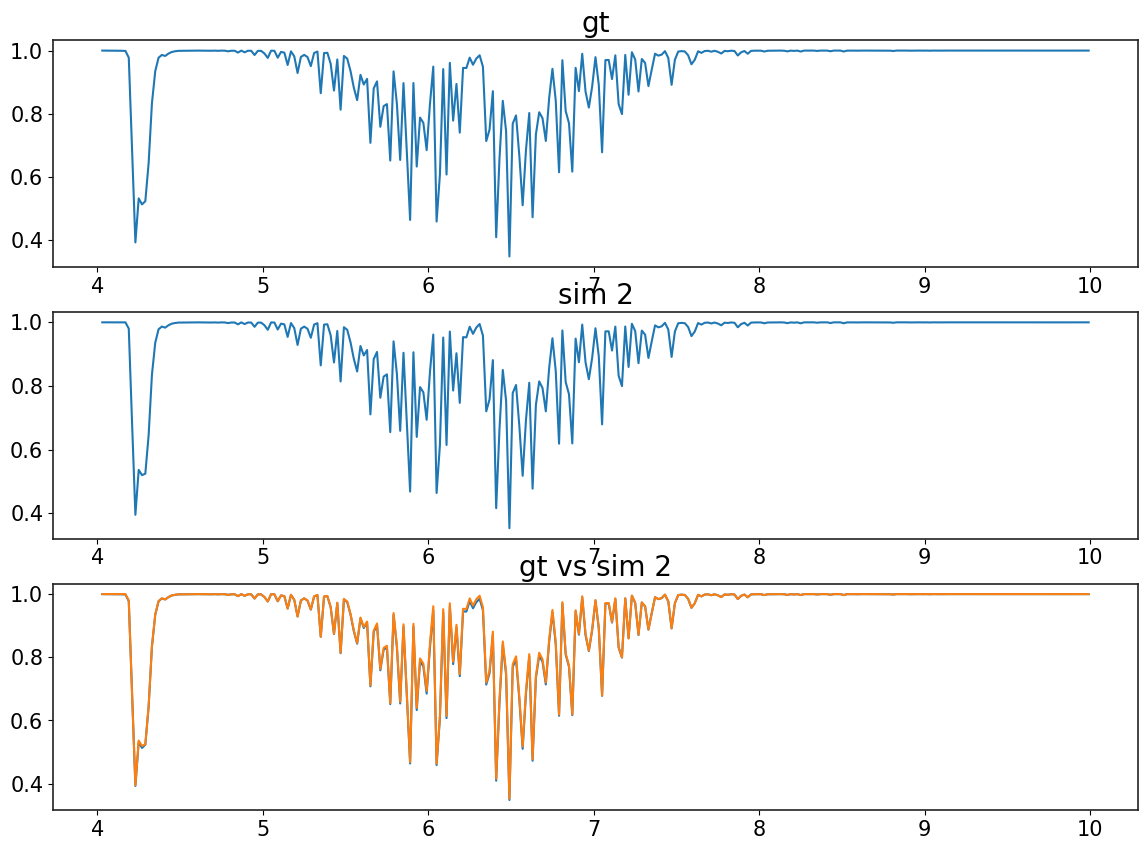

In [79]:
gt = np.load("SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim_2 = np.load("SIMULATED/Simulated_ALLGASES_2_4-10_1m.npy")
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.title('gt')
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.title('sim 2')
plt.plot(sim_2[0], sim_2[1])
plt.subplot(313)
plt.title('gt vs sim 2')
plt.plot(gt[0], gt[1])
plt.plot(sim_2[0], sim_2[1])

In [81]:
mae = np.mean(np.abs(gt[1]-sim_2[1]))
print("MAE:", mae)

MAE: 0.0018136515427661002


## ***Metrics***

In [11]:
import numpy as np

def unpack_spectrum(a):
    a = np.asarray(a)
    if a.ndim != 2:
        raise ValueError(f"Expected 2D, got {a.shape}")
    if a.shape[0] == 2:      # (2, N)
        lam, y = a[0], a[1]
    elif a.shape[1] == 2:    # (N, 2)
        lam, y = a[:, 0], a[:, 1]
    else:
        raise ValueError(f"Expected (2,N) or (N,2), got {a.shape}")
    return np.asarray(lam, float), np.asarray(y, float)


In [13]:
import numpy as np

def spectrum_metrics(y_true, y_pred, eps=1e-12):
    y_true = np.asarray(y_true, float)
    y_pred = np.asarray(y_pred, float)

    m = np.isfinite(y_true) & np.isfinite(y_pred)
    y_true = y_true[m]
    y_pred = y_pred[m]

    e = y_pred - y_true

    mae  = np.mean(np.abs(e))
    mse  = np.mean(e**2)
    rmse = np.sqrt(mse)
    medae = np.median(np.abs(e))
    maxae = np.max(np.abs(e))

    rel_l1 = np.sum(np.abs(e)) / (np.sum(np.abs(y_true)) + eps)

    mape  = np.mean(np.abs(e) / (np.abs(y_true) + eps))
    smape = np.mean(2.0 * np.abs(e) / (np.abs(y_true) + np.abs(y_pred) + eps))

    # Correlation + R2
    corr = np.corrcoef(y_true, y_pred)[0, 1] if y_true.size > 1 else np.nan
    ss_res = np.sum(e**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2) + eps
    r2 = 1.0 - ss_res / ss_tot

    # Spectral Angle Mapper (degrees) — very common in hyperspectral
    num = float(np.dot(y_true, y_pred))
    den = float(np.linalg.norm(y_true) * np.linalg.norm(y_pred) + eps)
    sam_deg = float(np.degrees(np.arccos(np.clip(num / den, -1.0, 1.0))))

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MedAE": medae,
        "MaxAE": maxae,
        "RelL1": rel_l1,
        "MAPE": mape,
        "sMAPE": smape,
        "Corr": corr,
        "R2": r2,
        "SAM_deg": sam_deg,
    }


In [29]:
lam_gt, y_gt = unpack_spectrum(gt)
lam_sm, y_sm = unpack_spectrum(sim)

# IMPORTANT: only valid if they’re already on the same wavelength grid!
print(spectrum_metrics(y_gt, y_sm))


{'MAE': 0.033921069205661486, 'RMSE': 0.06265709118698883, 'MedAE': 0.003082724590014685, 'MaxAE': 0.21175506874567823, 'RelL1': 0.036530811445903276, 'MAPE': 0.046750466888935076, 'sMAPE': 0.05229541538864588, 'Corr': 0.9826729822746403, 'R2': 0.764678013997252, 'SAM_deg': 3.5568595996705312}


## ***With LSF - W_um: 0.020***

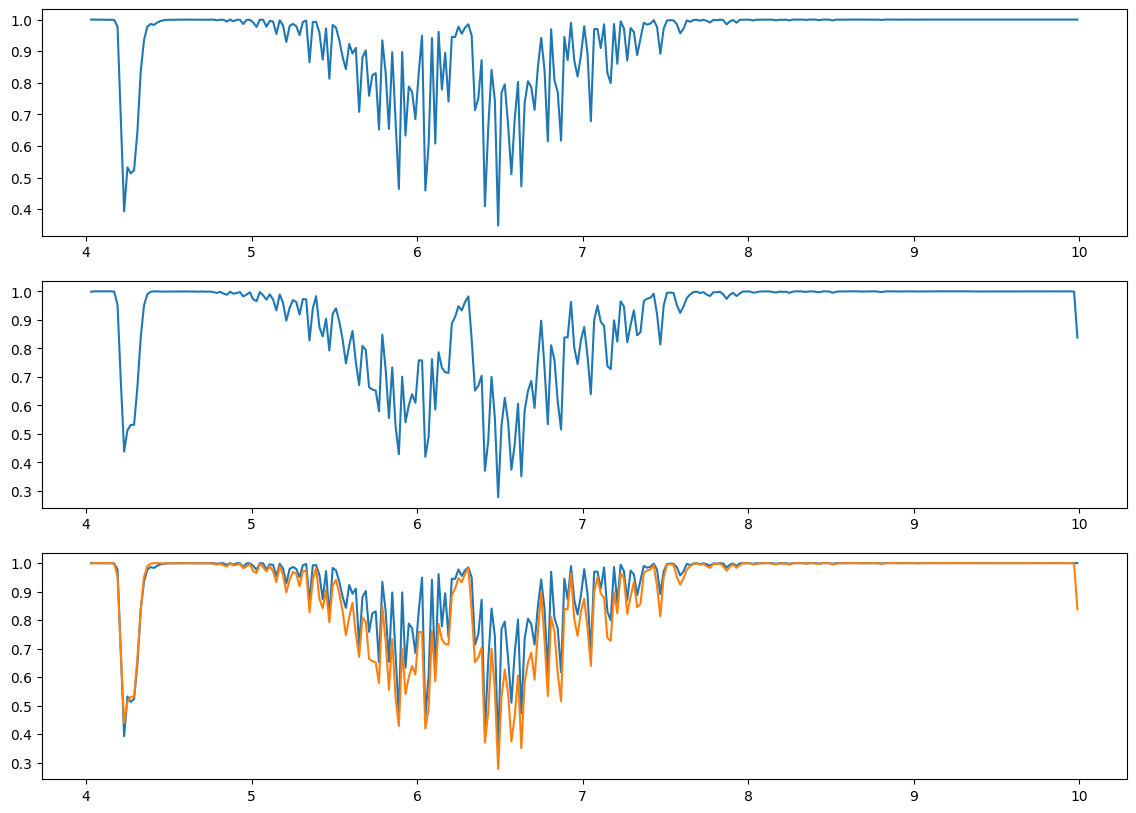

In [4]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_ALL_4-10_1m_LSF.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [5]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.034731136438656524


## ***With LSF - W_um: 0.005***

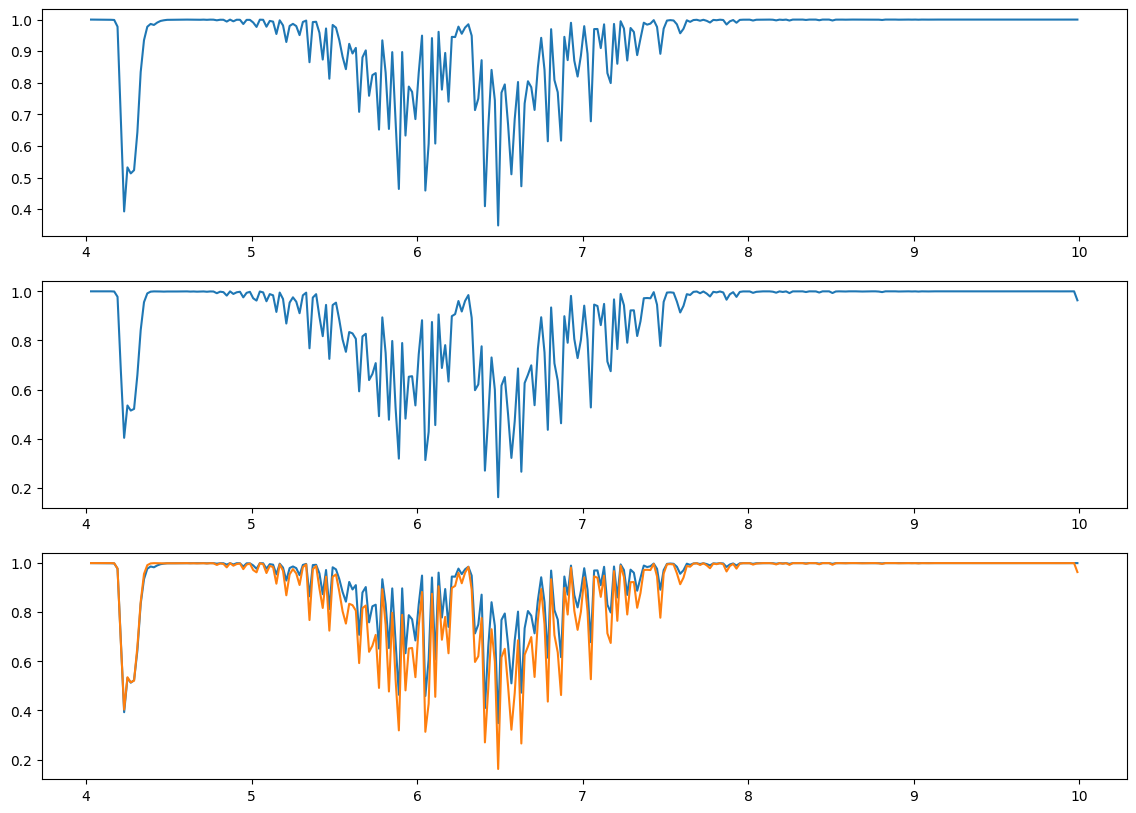

In [6]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_ALL_4-10_1m_LSF.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [7]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.0346889398528414


## ***With LSF - W_um: 0.001***

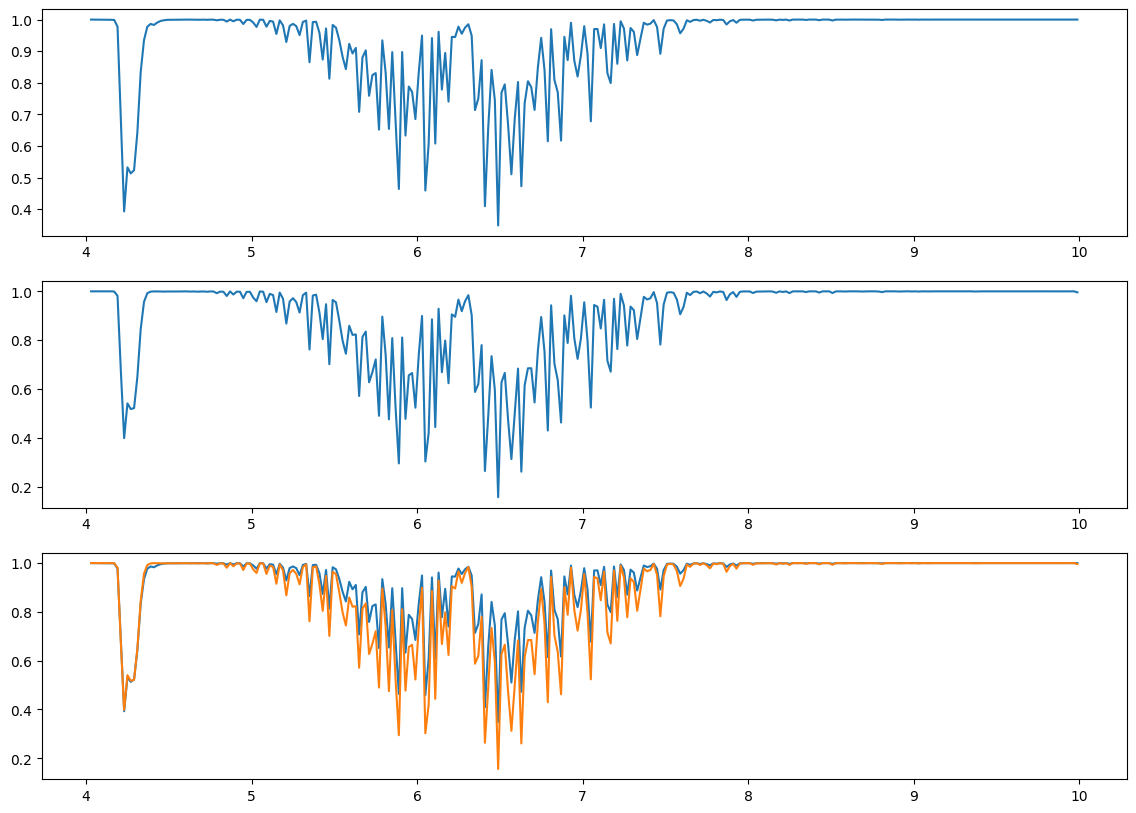

In [3]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_ALL_4-10_1m_LSF.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [4]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.034593902077942475


## ***With LSF - W_um: 0.05***

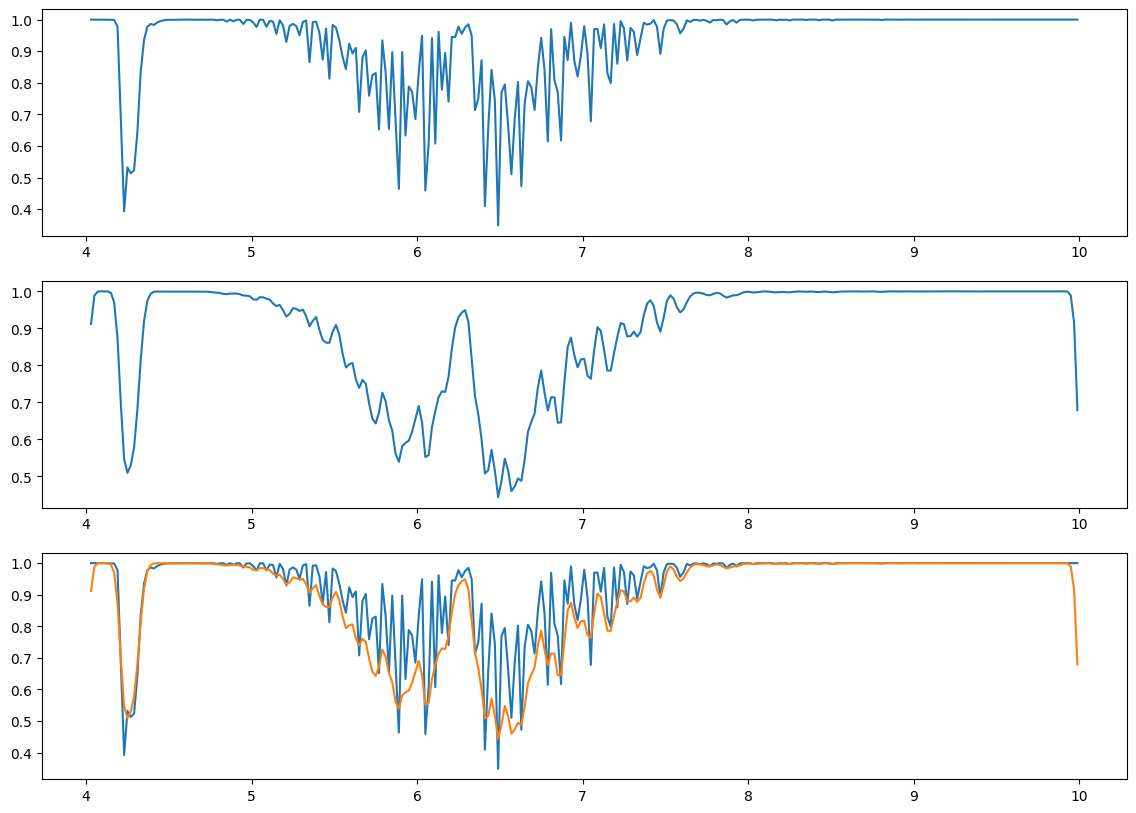

In [2]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_ALL_4-10_1m_LSF.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [3]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.04320190850558713


## ***With LSF - W_um: 0.01***

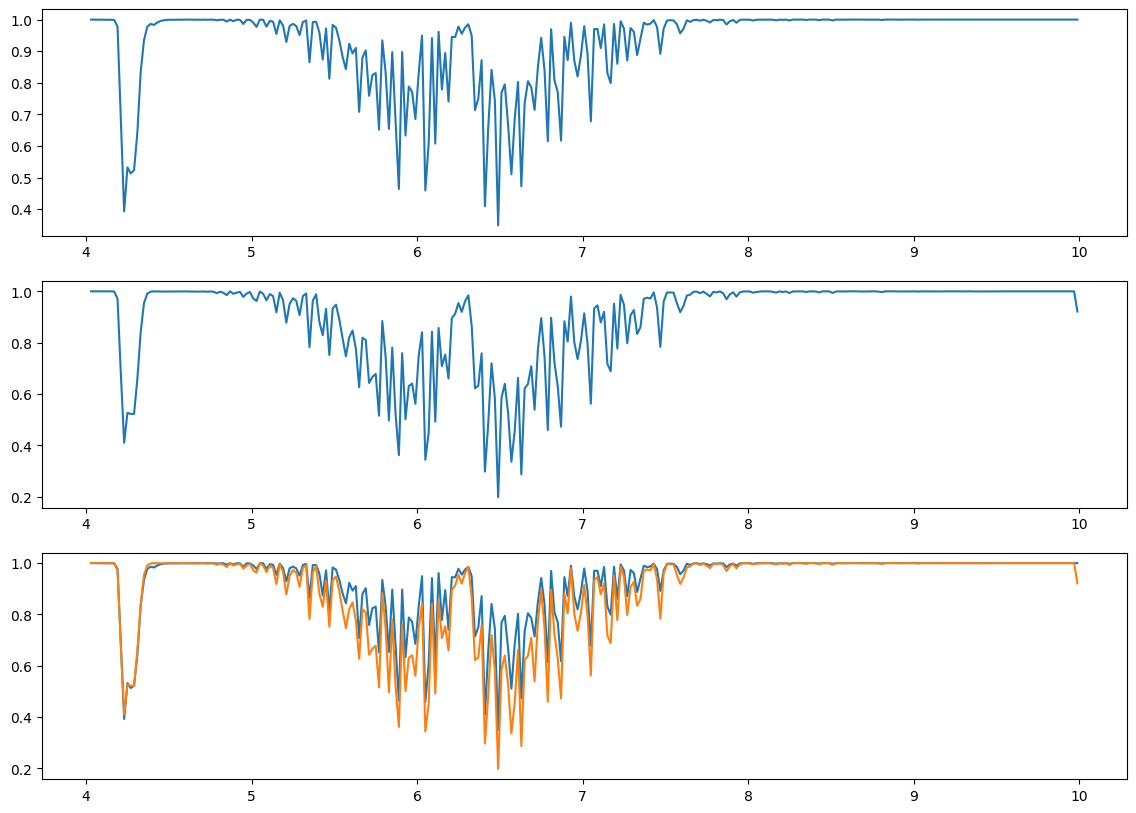

In [4]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_ALL_4-10_1m_LSF.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [5]:
mae = np.mean(np.abs(gt[1]-sim[1]))
print("MAE:", mae)

MAE: 0.03488885861099589


## **Fixing**

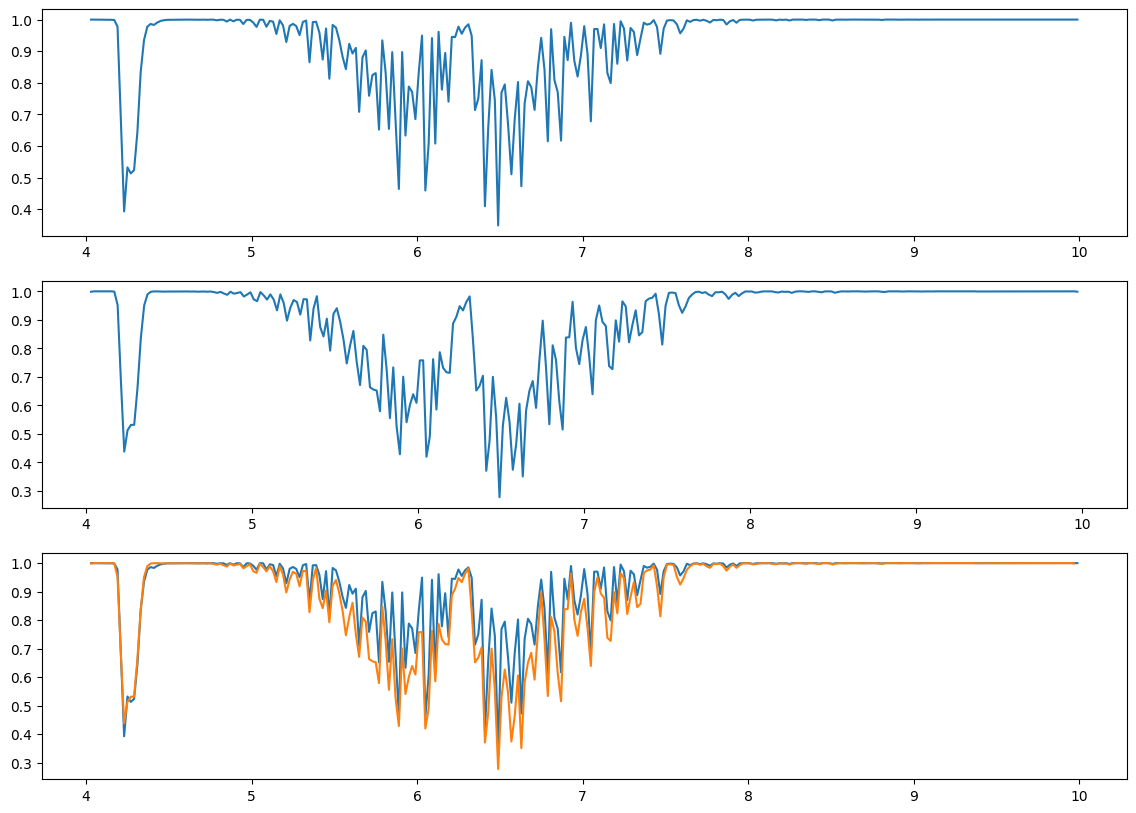

In [6]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Simulated_Total_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [14]:
# ...existing code...
# chequeo rápido de shapes y cálculo robusto de MAE

import numpy as np

# unpack (si ya tienes unpack_spectrum, úsalo)
lam_gt, y_gt = unpack_spectrum(gt)
lam_sim, y_sim = unpack_spectrum(sim)

print("shapes:", lam_gt.shape, y_gt.shape, lam_sim.shape, y_sim.shape)

# Opción A — solución rápida: recortar al mínimo tamaño
n = min(y_gt.size, y_sim.size)
mae_trim = np.mean(np.abs(y_gt[:n] - y_sim[:n]))
print("MAE (trim to min length):", mae_trim)

# Opción B — correcta: alinear por longitud de onda (interpolación de la simulada sobre la GT)
mask = (lam_gt >= lam_sim[0]) & (lam_gt <= lam_sim[-1])  # puntos de gt dentro del rango de sim
y_sim_on_gt = np.interp(lam_gt[mask], lam_sim, y_sim)     # interpola sim en la rejilla de gt
mae_interp = np.mean(np.abs(y_gt[mask] - y_sim_on_gt))
print("MAE (interpolated to GT wavelengths):", mae_interp)

# maneja NaNs si existen

shapes: (299,) (299,) (298,) (298,)
MAE (trim to min length): 0.034304042978649654
MAE (interpolated to GT wavelengths): 0.034304042978649654


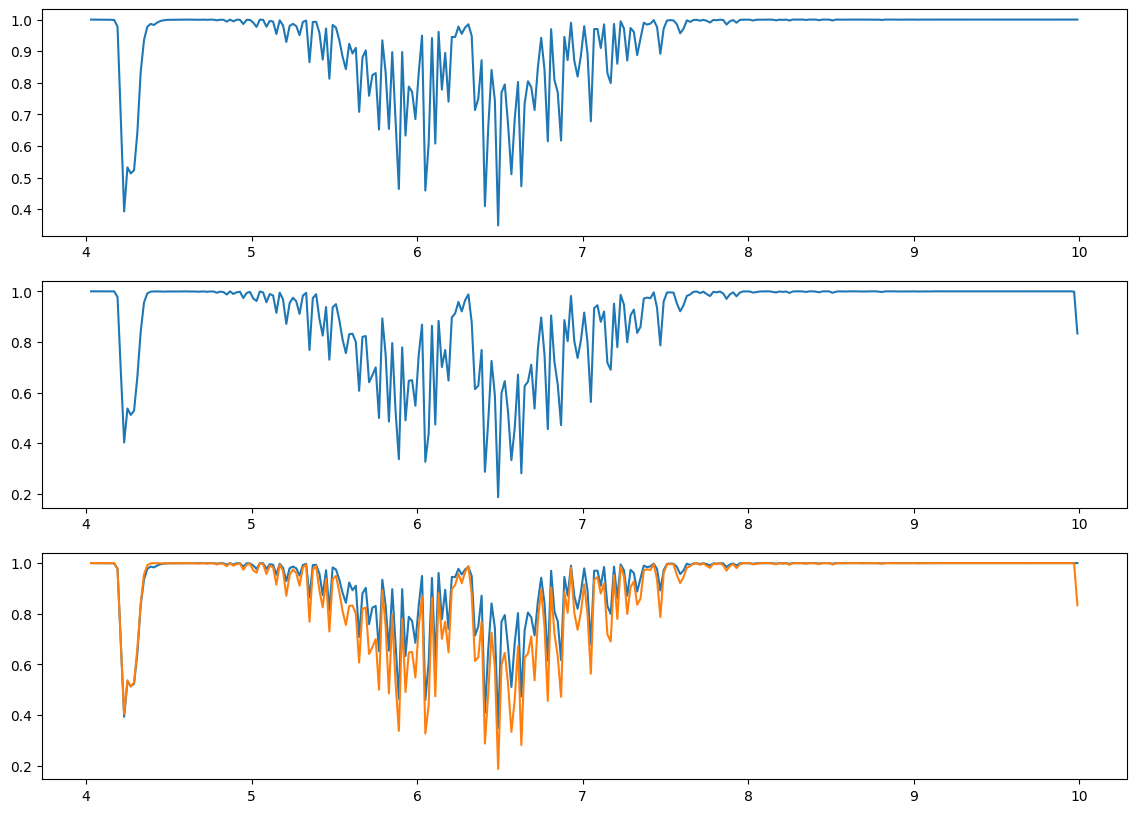

In [16]:
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/OUT/Simulated_All_4-10_1m.npy")  
plt.figure(figsize=(14, 10))
plt.subplot(311)
plt.plot(gt[0], gt[1])
plt.subplot(312)
plt.plot(sim[0], sim[1])
plt.subplot(313)
plt.plot(gt[0], gt[1])
plt.plot(sim[0], sim[1])

In [2]:
import numpy as np

def inspect_grid(lam_um, name=""):
    lam_um = np.asarray(lam_um).copy()
    # asegurar orden ascendente
    if lam_um[0] > lam_um[-1]:
        lam_um = lam_um[::-1]

    dlam = np.diff(lam_um)
    nu = 1e4 / lam_um
    # nu decrece si lam crece -> usar abs
    dnu = np.abs(np.diff(nu))

    def stats(x):
        return dict(min=float(np.min(x)), p50=float(np.median(x)), max=float(np.max(x)),
                    mean=float(np.mean(x)), cv=float(np.std(x)/np.mean(x)))

    print(f"\n=== {name} ===")
    print("N:", lam_um.size)
    print("dlam stats:", stats(dlam))
    print("dnu  stats:", stats(dnu))
    print("Interpretación: si CV(dnu) << CV(dlam), tu grilla es 'más constante' en cm^-1.")

# cargar npy tipo [2,N]
gt = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/SIMULATED/Transmittance_ALLGASES_4-10_1m__downsampled_to_Simulated_ALLGASES_4-10_1m.npy")
sim = np.load("/home/jleon13/Documents/AFOSR project/Py4catsForward/forwardOscar/Stand-off/OUT/Simulated_All_4-10_1m.npy")  

inspect_grid(gt[0], "GT SpectralCalc")
inspect_grid(sim[0], "Simulado")



=== GT SpectralCalc ===
N: 299
dlam stats: {'min': 0.019999999999998685, 'p50': 0.019999999999999574, 'max': 0.019999999999999574, 'mean': 0.01999999999999957, 'cv': 2.568336125267209e-15}
dnu  stats: {'min': 2.0080260802427574, 'p50': 4.070028917555419, 'max': 12.253775694635806, 'mean': 4.967746903230731, 'cv': 0.5423072142088939}
Interpretación: si CV(dnu) << CV(dlam), tu grilla es 'más constante' en cm^-1.

=== Simulado ===
N: 299
dlam stats: {'min': 0.019999999999998685, 'p50': 0.019999999999999574, 'max': 0.019999999999999574, 'mean': 0.01999999999999957, 'cv': 2.568336125267209e-15}
dnu  stats: {'min': 2.0080260802427574, 'p50': 4.070028917555419, 'max': 12.253775694635806, 'mean': 4.967746903230731, 'cv': 0.5423072142088939}
Interpretación: si CV(dnu) << CV(dlam), tu grilla es 'más constante' en cm^-1.


# temp

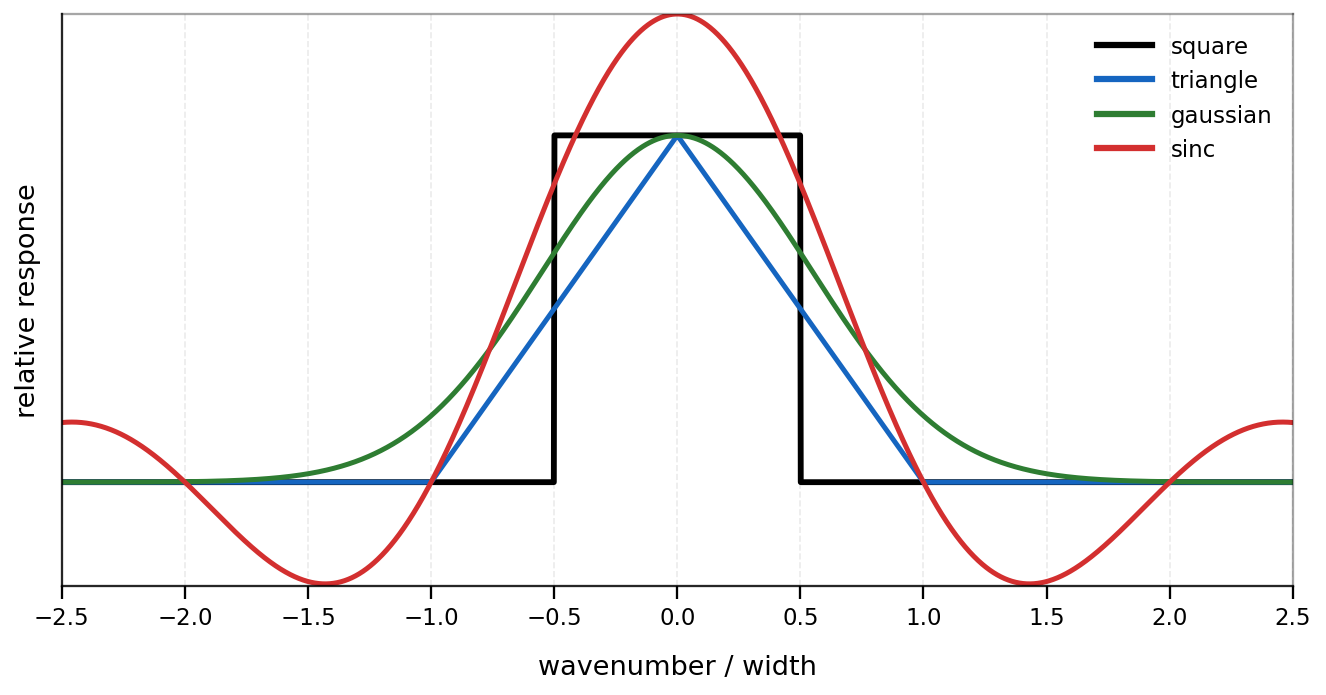

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Domain (wavenumber/width)
x = np.linspace(-2.5, 2.5, 2000)

# LSF-like shapes
square   = np.where(np.abs(x) <= 0.5, 1.0, 0.0)
triangle = np.clip(1.0 - np.abs(x), 0.0, None)
gaussian = np.exp(-0.5 * (x / 0.55) ** 2)     # visually tuned to match the reference
A = 1.35          # pico = 1.35 en x=0 (ajusta a gusto)
sinc = A * np.sinc(x)
                     # np.sinc(x) = sin(pi x)/(pi x)

# Polished styling
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.linewidth": 1.1,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
})

fig, ax = plt.subplots(figsize=(9, 4.8), dpi=150)

ax.plot(x, square,   color="black",   lw=2.8, label="square")
ax.plot(x, triangle, color="#1565C0", lw=2.4, label="triangle")
ax.plot(x, gaussian, color="#2E7D32", lw=2.4, label="gaussian")
ax.plot(x, sinc,     color="#D32F2F", lw=2.4, label="sinc")

ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-0.3, 1.35)
ax.set_xlabel("wavenumber / width", labelpad=12)
ax.set_ylabel("relative response", labelpad=10)

ax.set_xticks(np.arange(-2.5, 2.6, 0.5))
ax.set_yticks([])  # matches the style of your reference image

ax.tick_params(axis="x", length=6, width=1.1, direction="out")
ax.tick_params(axis="y", length=0)

# Subtle grid
ax.grid(True, axis="x", linestyle="--", alpha=0.25)
ax.grid(True, axis="y", linestyle="--", alpha=0.15)

leg = ax.legend(loc="upper right", frameon=False, handlelength=2.4)
for line in leg.get_lines():
    line.set_linewidth(3.0)

# Softer top/right spines
ax.spines["top"].set_alpha(0.35)
ax.spines["right"].set_alpha(0.35)
ax.spines["left"].set_alpha(0.85)
ax.spines["bottom"].set_alpha(0.85)

fig.tight_layout()
fig.savefig("lsf_shapes_fancy.png", bbox_inches="tight")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/lsf_shapes_fancy_with_fwhm.png'

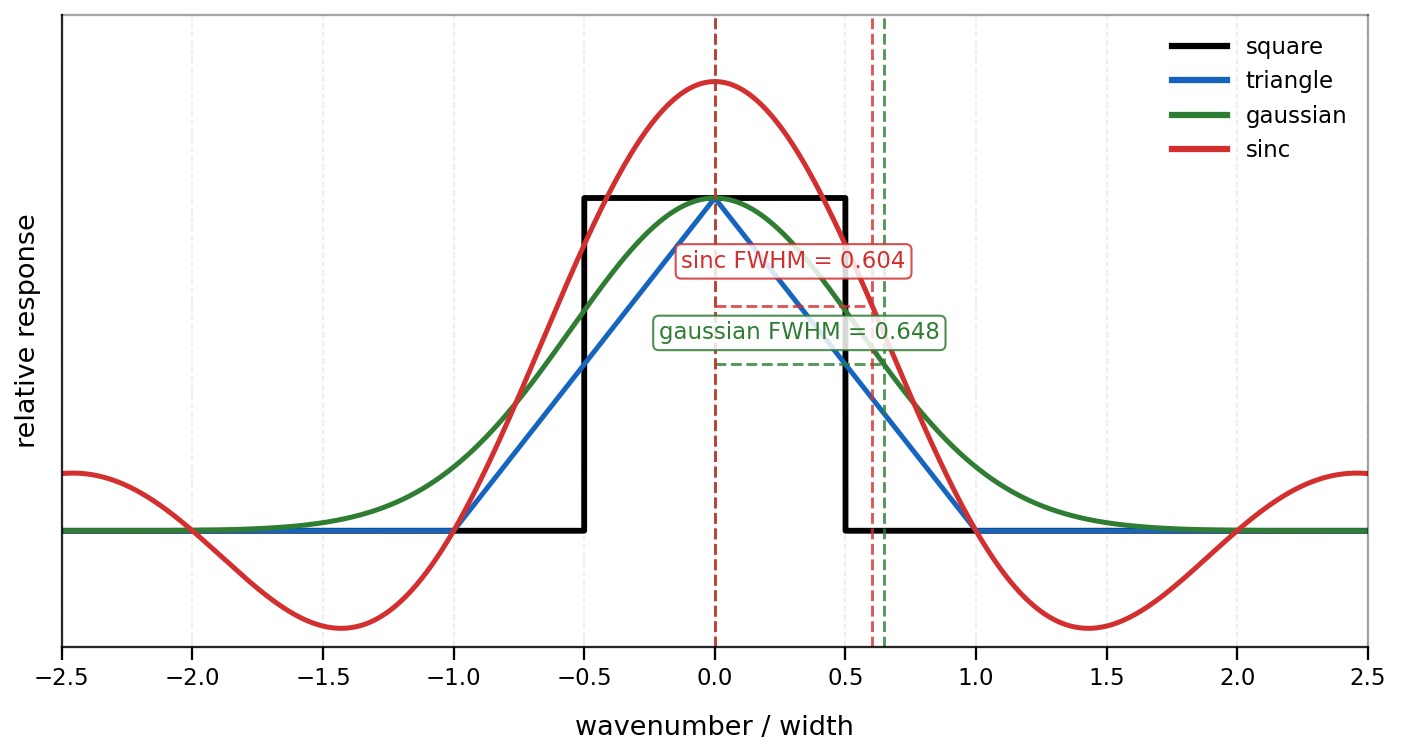

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Domain (wavenumber/width)
x = np.linspace(-2.5, 2.5, 40001)  # dense for accurate FWHM

# LSF-like shapes
square   = np.where(np.abs(x) <= 0.5, 1.0, 0.0)
triangle = np.clip(1.0 - np.abs(x), 0.0, None)

# Gaussian (keep same as before)
sigma = 0.55
gaussian = np.exp(-0.5 * (x / sigma) ** 2)

# Scaled sinc (make the peak higher)
A_sinc = 1.35
sinc = A_sinc * np.sinc(x)  # np.sinc(x)=sin(pi x)/(pi x)

def fwhm_numeric(x, y):
    """Return (x_left, x_right, width, y_half) for the main peak around x=0."""
    y0 = y[np.argmin(np.abs(x))]
    y_half = 0.5 * y0

    # Ensure we focus on the main peak around 0: search outward from center.
    i0 = np.argmin(np.abs(x))

    # Left crossing
    yl = y[:i0+1]
    xl = x[:i0+1]
    # find last index where y >= half on left side
    idxs = np.where(yl >= y_half)[0]
    if len(idxs) == 0:
        return None
    iL = idxs[0]  # first index (far left) above half
    # but want crossing near center: take last above-half before dropping below when moving from center outward
    idxs2 = np.where(yl[::-1] >= y_half)[0]
    iL2 = i0 - idxs2[0]
    # bracket crossing: (iL2-1, iL2) should cross
    j1 = max(iL2-1, 0)
    j2 = iL2
    # linear interp for crossing
    x_left = np.interp(y_half, [y[j1], y[j2]], [x[j1], x[j2]]) if y[j1] != y[j2] else x[j2]

    # Right crossing
    yr = y[i0:]
    xr = x[i0:]
    idxs3 = np.where(yr >= y_half)[0]
    if len(idxs3) == 0:
        return None
    # crossing near center: find first index where y falls below half
    below = np.where(yr < y_half)[0]
    if len(below) == 0:
        return None
    k2 = below[0]
    k1 = max(k2-1, 0)
    # linear interp
    x_right = np.interp(y_half, [yr[k1], yr[k2]], [xr[k1], xr[k2]]) if yr[k1] != yr[k2] else xr[k2]

    return x_left, x_right, (x_right - x_left), y_half

# Compute FWHM for Gaussian and sinc (main peak)
g_fwhm = fwhm_numeric(x, gaussian)
s_fwhm = fwhm_numeric(x, sinc)

# Plot styling
plt.rcParams.update({
    "font.family": "DejaVu Sans",
    "font.size": 12,
    "axes.labelsize": 13,
    "axes.linewidth": 1.1,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
    "legend.fontsize": 11,
})

fig, ax = plt.subplots(figsize=(9.5, 5.2), dpi=150)

# Curves
ax.plot(x, square,   color="black",   lw=2.8, label="square")
ax.plot(x, triangle, color="#1565C0", lw=2.4, label="triangle")
ax.plot(x, gaussian, color="#2E7D32", lw=2.4, label="gaussian")
ax.plot(x, sinc,     color="#D32F2F", lw=2.4, label="sinc")

# FWHM annotations
def draw_fwhm(ax, fwhm_tuple, color, name, y_text_shift=0.05):
    if fwhm_tuple is None:
        return
    xL, xR, w, yhalf = fwhm_tuple
    # dashed vertical lines and half-max horizontal segment
    ax.axvline(xL, color=color, ls="--", lw=1.4, alpha=0.8)
    ax.axvline(xR, color=color, ls="--", lw=1.4, alpha=0.8)
    ax.hlines(yhalf, xL, xR, colors=color, linestyles="--", lw=1.4, alpha=0.8)
    # label
    xm = 0.5 * (xL + xR)
    ax.text(
        xm, yhalf + y_text_shift,
        f"{name} FWHM = {w:.3f}",
        color=color, ha="center", va="bottom", fontsize=11,
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec=color, alpha=0.85, lw=1.0)
    )

draw_fwhm(ax, g_fwhm, "#2E7D32", "gaussian", y_text_shift=0.06)
draw_fwhm(ax, s_fwhm, "#D32F2F", "sinc",     y_text_shift=0.10)

# Axes & labels
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-0.35, 1.55)
ax.set_xlabel("wavenumber / width", labelpad=12)
ax.set_ylabel("relative response", labelpad=10)

ax.set_xticks(np.arange(-2.5, 2.6, 0.5))
ax.set_yticks([])  # match style

ax.tick_params(axis="x", length=6, width=1.1, direction="out")
ax.tick_params(axis="y", length=0)

# Subtle grid
ax.grid(True, axis="x", linestyle="--", alpha=0.25)
ax.grid(True, axis="y", linestyle="--", alpha=0.12)

# Legend
leg = ax.legend(loc="upper right", frameon=False, handlelength=2.4)
for line in leg.get_lines():
    line.set_linewidth(3.0)

# Spines
ax.spines["top"].set_alpha(0.35)
ax.spines["right"].set_alpha(0.35)
ax.spines["left"].set_alpha(0.85)
ax.spines["bottom"].set_alpha(0.85)

fig.tight_layout()

out_path = "/mnt/data/lsf_shapes_fancy_with_fwhm.png"
fig.savefig(out_path, bbox_inches="tight")
out_path
